# Handwritten Digits Recognition


## Introduction

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.
Your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.


In [6]:
### importing libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import mnist

from skimage.transform import resize
import cv2
from tqdm import tqdm

from sklearn.metrics import confusion_matrix

from IPython.display import Image

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pickle

In [8]:
# loading mnist dataset

In [9]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
print('traning data',x_train.shape)
print('traning label',y_train.shape)
print('test data',x_test.shape)
print('test label',y_test.shape)

traning data (60000, 28, 28)
traning label (60000,)
test data (10000, 28, 28)
test label (10000,)


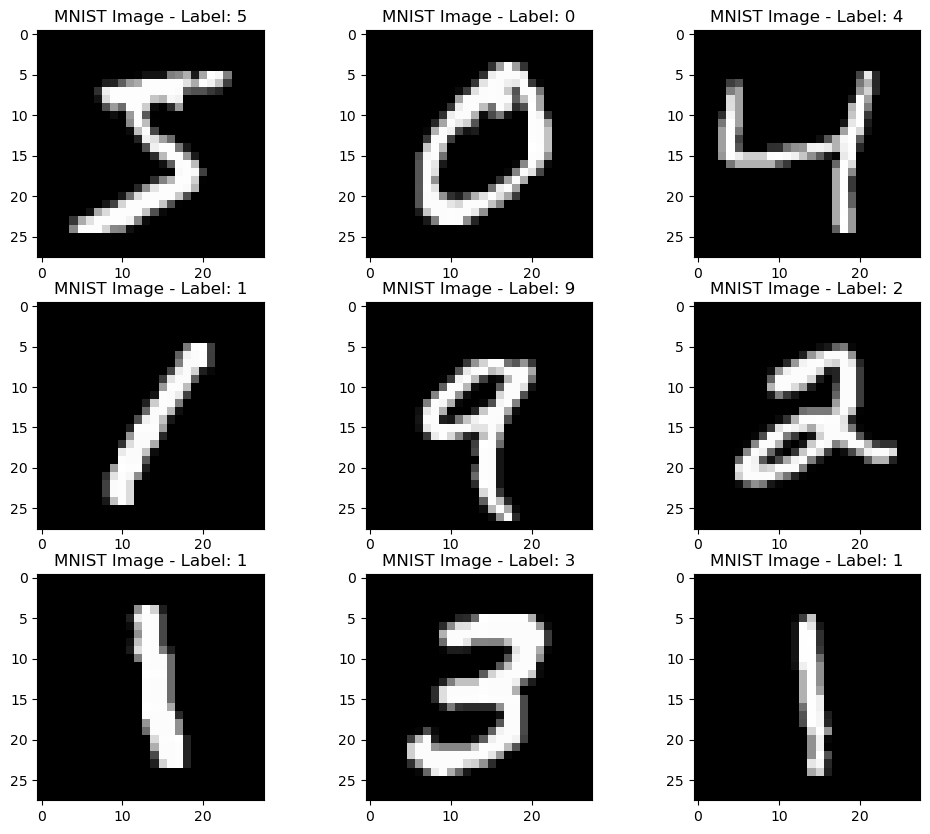

In [11]:
plt.figure(figsize = (12,10))
for i in range(9):
    ax = plt.subplot(3,3,i+1)
    image_index = i
    image = x_train[image_index]
    label = y_train[image_index]
    
    # Plot the image
    ax.imshow(image, cmap='gray')
    ax.title.set_text(f'MNIST Image - Label: {label}')
plt.show()

### Learning

## CNN

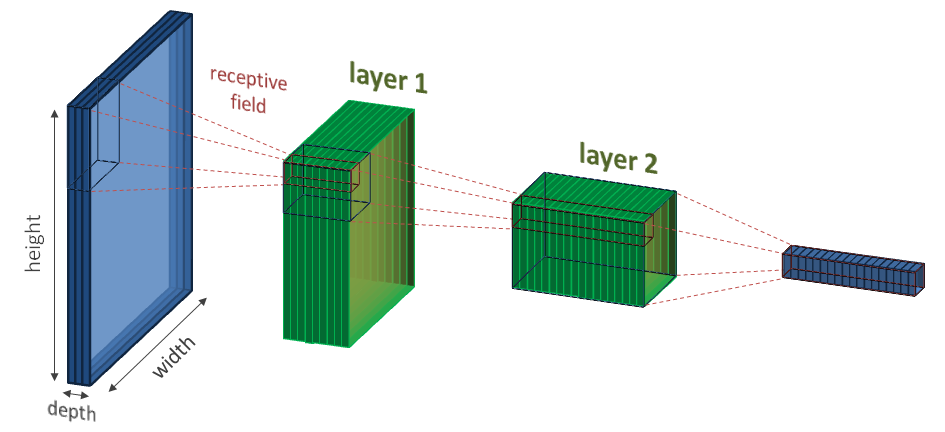

In [14]:
# Display an image file
Image(filename='cnn.png')

### Convolution layer

Convolutional layers are the main **building blocks** of CNNs. They work by taking the **dot product** with a set of **filters** and a **sliding window** of the input image. The result is a set of local **features**, like edges and constrast, that can be helpful in describing the images. The learnable parameters are only the **weights** contained in the filters and due to their small size, these layers can be implemented quite **effeciently**

### Convolution Operation
It is nothing but component wise multiplication and addition

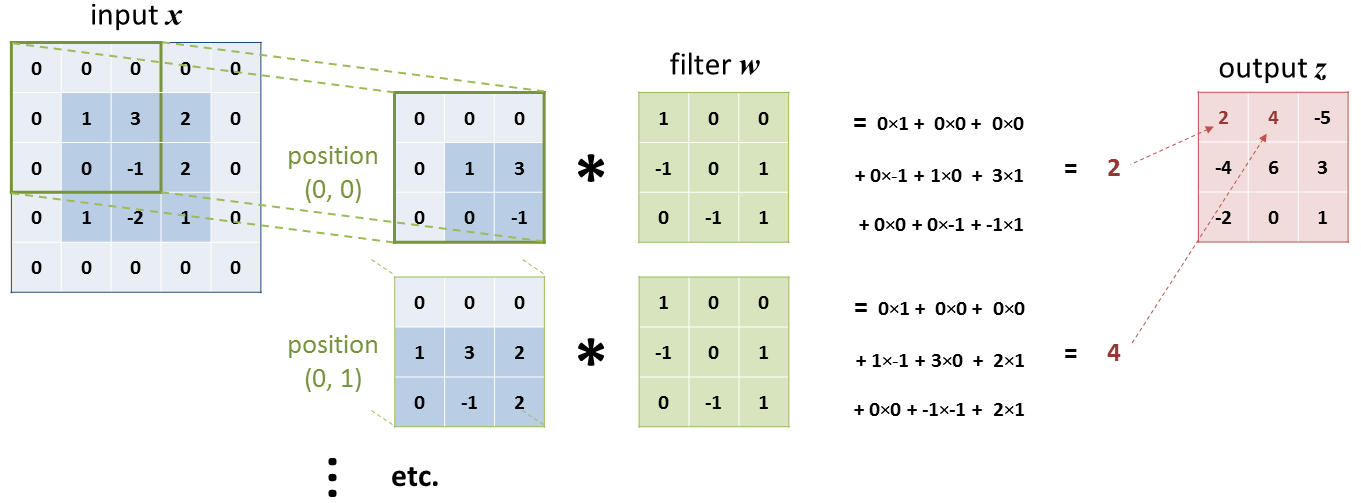

In [18]:
Image(filename='convop.png')

### Pooling Layer
The primary function of the pooling layer is to **downsample** the image sizes, e.g. from 64x64 to 32x32. It works by partitioning the image into squares and applying a **non-linear transformation** over thoses squares. The most common types of pooling are **average pooling**, where the average is taken of each square, and **max pooling**, where the maximum is taken of each square.

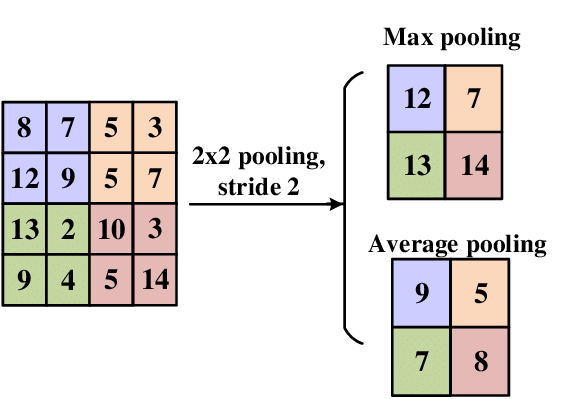

In [20]:
Image(filename='pooling_layer.png')

### Activation Function

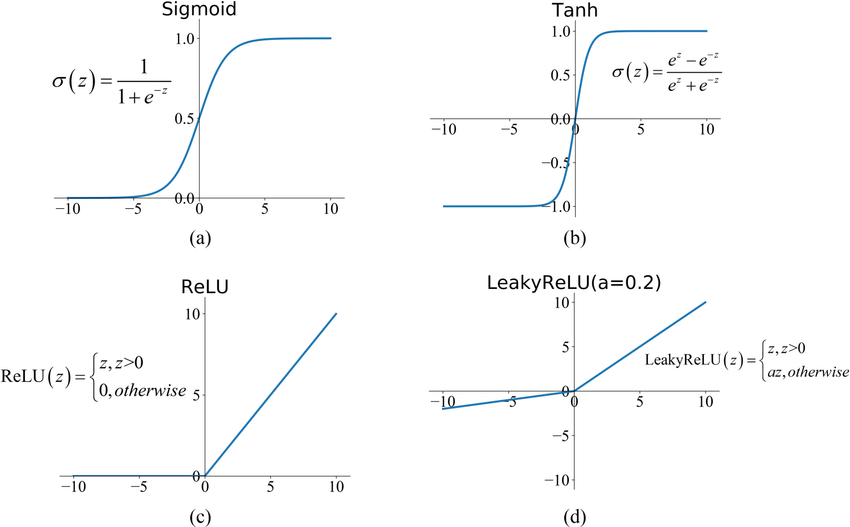

In [22]:
Image(filename='activation_fun.png')

Activation functions apply a **non-linear transformation** to the previous later, which enable the model to **learn more complex relationships**. Common activation functions are the **Rectified Linear Unit (ReLU)**, hyperbolic tan (tanh) and sigmoid. For the final layer, **softmax** can be used to produce predicted class probabilities.

### Dense layer

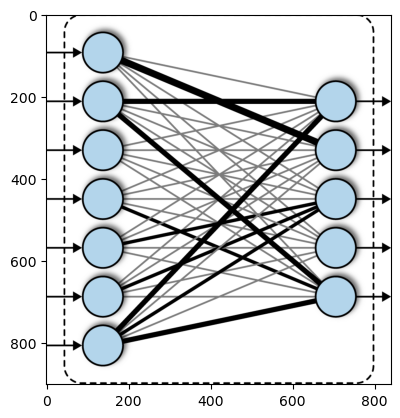

In [25]:
import matplotlib.image as mpimg

# Load and display an image using Matplotlib
img = mpimg.imread('dense_layer.png')
imgplot = plt.imshow(img)
plt.show()

Dense or **fully connected** layers are the standard layers in a neural network, where every neuron in the previous layer is connected to the current layer through weights and biases. 

### Dropout

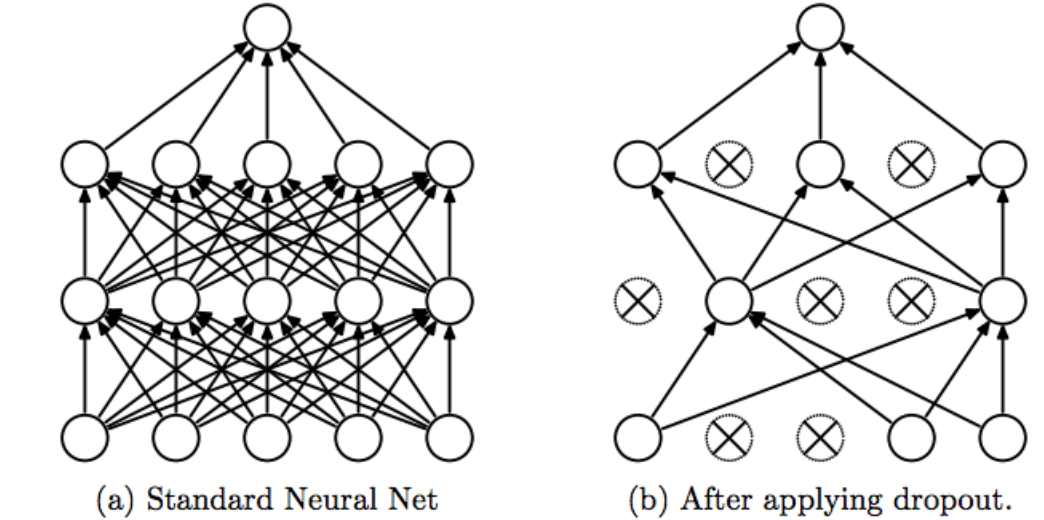

In [28]:
Image(filename='dropout.png')

Dropout is a clever way to **prevent** your model from **overfitting** the training data by **randomly 'turning off'** each neuron **independently** with some probability p. The result is that the model cannot rely on any particular neuron and instead has to make predictions using several different neurons. 

### Data Augmentation
Training deep convolutional networks with a limited dataset can be challenging due to overfitting. To overcome this, AlexNet used the data augmentation approach to increase the size of the training dataset artificially. Data augmentation creates new images by randomly altering the original images. Alterations include cropping, flipping, rotating, adding noise, and changing the colors of the original images.

The data augmentation approach significantly increases the size and quality of the training dataset in the AlexNet model, leading to increased generalization, improved training speed and accuracy, and addressing overfitting

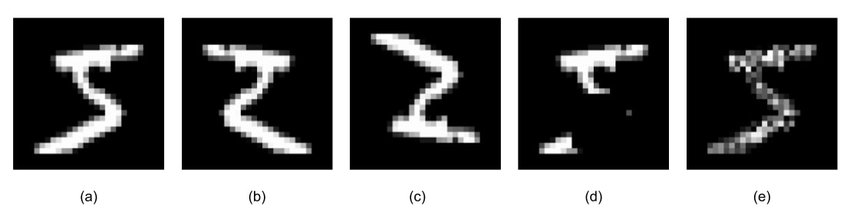

In [31]:
Image(filename='augumented.png')

### we will train out data set on different Architecture
1. LeNet
2. AlexNet
3. Transfer learning(VGG16, ResNet, GoogleNet(inceptionNet))


# LeNet

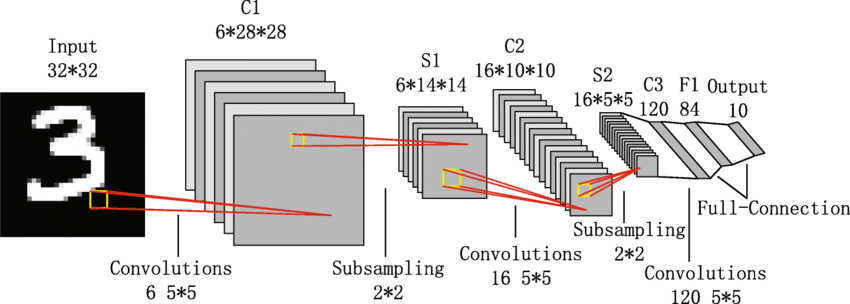

In [34]:
Image(filename='lenet-5.png')

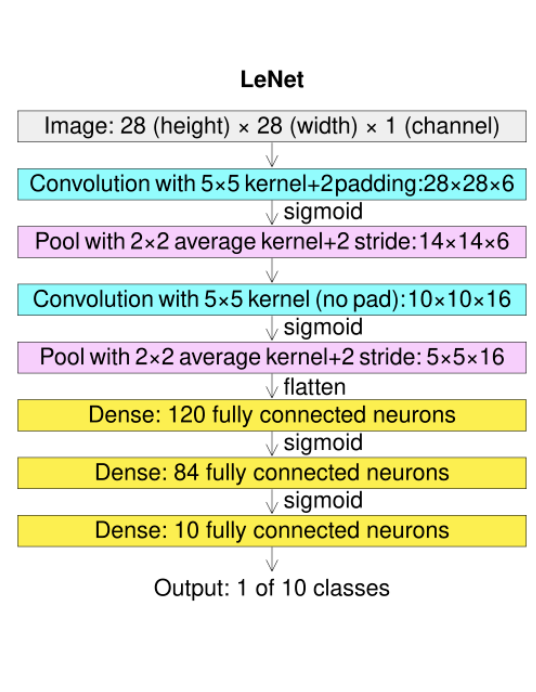

In [326]:
Image(filename='Lenet.png')

__LeNet-5__ is a 5 layer CNN made up of **2 convolutional layers** with average pooling followed by **3 fully connected layers**. 

*Notes:*

* It is interesting to note that at the time the perfered **activation functions** were all smooth (e.g. sigmoid, tanh, etc). It was not until later (~2010) that ReLU took over as the prefered activation function we see today. 

* Furthermore, **average pooling** wasn't used for any significant reason other than to reduce the size of the network to be able to train it in a reasonable time. **Maxpooling** was quickly found to produce better results and provide additional properties like translation invariance. 

* Finally, observe the pattern that as you go **deeper** into the network, the **image sizes** tend to **shrink** and the number of **channels**/filters tends to **increase**. This pattern is still favoured today. 

In [36]:
# building LeNet Architecture 

def lenet_5(input_shape = (28,28,1)):
    model = keras.Sequential([

    #input shape
    keras.Input(shape = input_shape),  # shape(28,28,1)

    #layer 1
    layers.Conv2D(filters = 6, kernel_size=(5,5), padding ='same', activation='sigmoid'), #shape = (28,28,6)
    layers.AveragePooling2D(pool_size = (2,2), strides=(2,2), padding = 'valid'), #shape = (14,14,6)

    #layer 2
    layers.Conv2D(filters = 16, kernel_size = (5,5), padding = 'valid', activation = 'sigmoid'), #shape = (10,10,16)
    layers.AveragePooling2D(pool_size = (2,2), strides = (2,2), padding = 'valid'), #shape = (5,5,16)

    #layer 3
    layers.Flatten(),               #shape = (400,1)
    layers.Dense(units =120, activation = 'sigmoid'), #shape = (120,1)

    #layer 4
    layers.Dense(units = 84, activation = 'sigmoid' ), #shape = (84,1)

    #layer 5
    layers.Dense(units = 10, activation = 'softmax')
    ])

    return model


In [37]:
model = lenet_5()
model.summary()

2024-08-03 12:34:29.440966: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2024-08-03 12:34:29.441001: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-08-03 12:34:29.441009: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-08-03 12:34:29.441288: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-03 12:34:29.441306: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

### preprocessing data

In [40]:
#normalizing the dataset
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# reshape
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

#categorizing
y_train = to_categorical(y_train)
y_test =  to_categorical(y_test)


#initilize the optimizer to the model
model.compile(loss="categorical_crossentropy", optimizer= keras.optimizers.SGD(learning_rate = 0.001), metrics=["accuracy"])
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# TensorBoard
callbacks = [
  # Write TensorBoard logs to './logs' directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [111]:
#fit
history = model.fit(x_train, y_train, batch_size = 128 , epochs = 20, verbose = 1, validation_split = 0.95, callbacks = callbacks)
score = model.evaluate(x_test, y_test, verbose= 1)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.1094 - loss: 2.3002 - val_accuracy: 0.1123 - val_loss: 2.3045
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.1070 - loss: 2.3042 - val_accuracy: 0.1123 - val_loss: 2.3042
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.1230 - loss: 2.3018 - val_accuracy: 0.1123 - val_loss: 2.3040
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.1231 - loss: 2.2988 - val_accuracy: 0.1123 - val_loss: 2.3038
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.1129 - loss: 2.3019 - val_accuracy: 0.1123 - val_loss: 2.3036
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.1219 - loss: 2.2998 - val_accuracy: 0.1123 - val_loss: 2.3035
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.1084 - loss: 2.3025 - val_accuracy: 0.1123 - val_loss: 2.3033
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.1169 - loss: 2.3010 - val_accuracy: 0.

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [270]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step


In [276]:
score[0]

2.302253007888794

In [278]:
score[1]

0.11349999904632568

In [55]:
%tensorboard --logdir ./logs

UsageError: Line magic function `%tensorboard` not found.


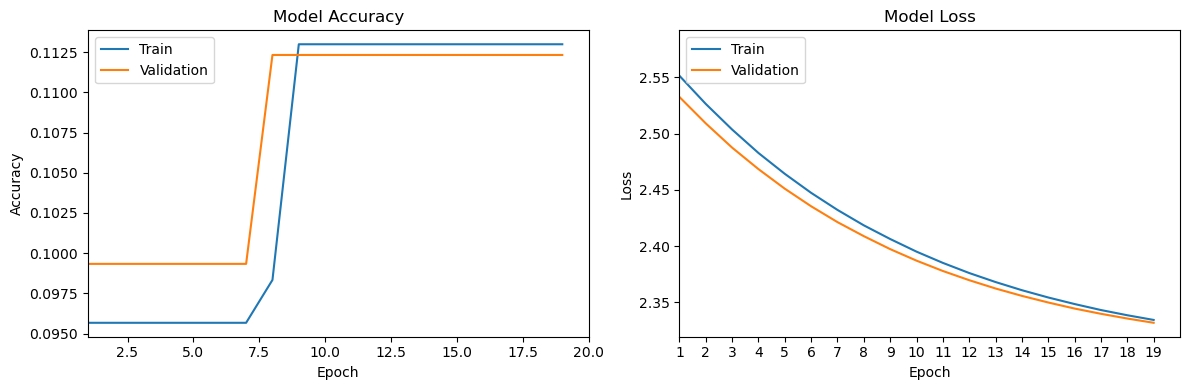

In [272]:
# df = pd.Dataframe(history.history)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot training & validation accuracy values
ax[0].plot(df['accuracy'])
ax[0].plot(df['val_accuracy'])
ax[0].set_xlim(1, len(df))
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
ax[1].plot(df['loss'])
ax[1].plot(df['val_loss'])
ax[1].set_xlim(1, len(df))
ax[1].set_xticks(range(1, len(df)))  # Set x-axis ticks to integers
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

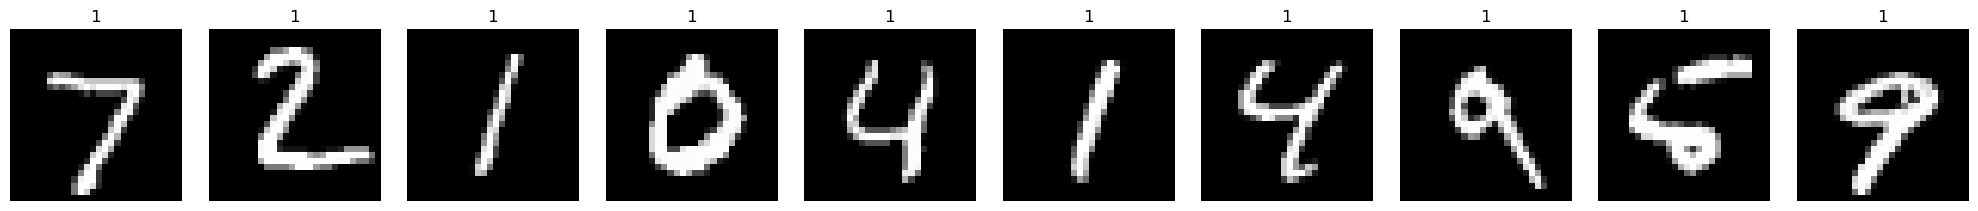

In [288]:
num_images = 10
pred_classes = np.argmax(y_pred, axis =1)
# Create a figure
plt.figure(figsize=(num_images * 2, 4))

for i in range(num_images):
    # Display y_test images
    plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"{pred_classes[i]}")
    plt.axis('off')
    
    # # Display y_pred images
    # plt.subplot(2, num_images, num_images + i + 1)
    # plt.imshow(y_pred[i], cmap='gray')
    # plt.title("Pred")
    # plt.axis('off')

plt.tight_layout()
plt.show()

In [312]:
test_classes = np.argmax(y_test, axis =1)
np.unique(test_classes)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [190]:
# confusion matrix
def confusion_matrixes(test_classes, pred_classes):
    test_cm = confusion_matrix(test_classes, pred_classes)
    col_n = [str(i) for i in range(10)]
    df_test = pd.DataFrame(test_cm,index = col_n, columns= col_n)
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_test, annot=True, cmap='inferno', fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

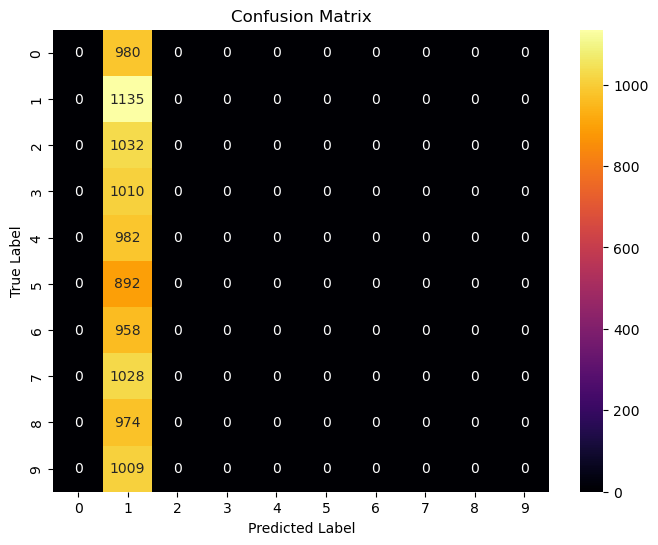

In [322]:
confusion_matrixes()

### Here we can see that LeNet is performing worst and also have accuray very less (0.11 ~ 10% ) and loss of (2.30) on test data 

# 2. AlexNet

rovided a breakthrough moment in Deep Learning by showing the world the power of CNNs. After Alex won the ImageNet competition he presented his work to leading researches at a conference and wrote what some call the **most influential** [paper](https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf) in the field of computer vision, which so far has **over 100,000 citations**. 

*Notes:*

* Many **improvements** have been made compared to LeNet-5. **ReLU** is the activation used, which makes training much faster. **Maxpooling** is being used instead of average pooling. And **dropout** has been introduced, a type of regularisation which allows the model to go deeper without overfitting.
* We still observe the pattern that as you go **deeper** the **image sizes decrease** and the number of **channels increase**. 

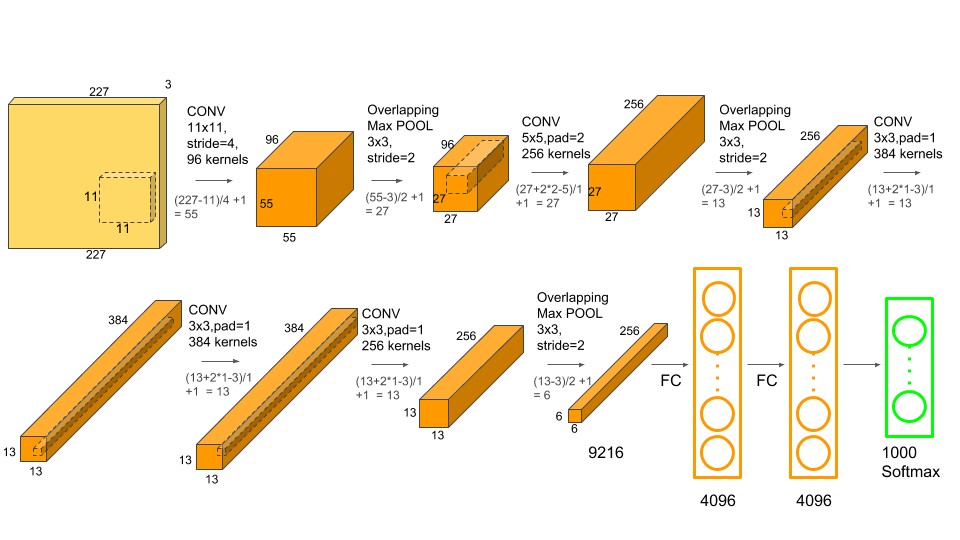

In [328]:
Image(filename='AlexNet_img.png')

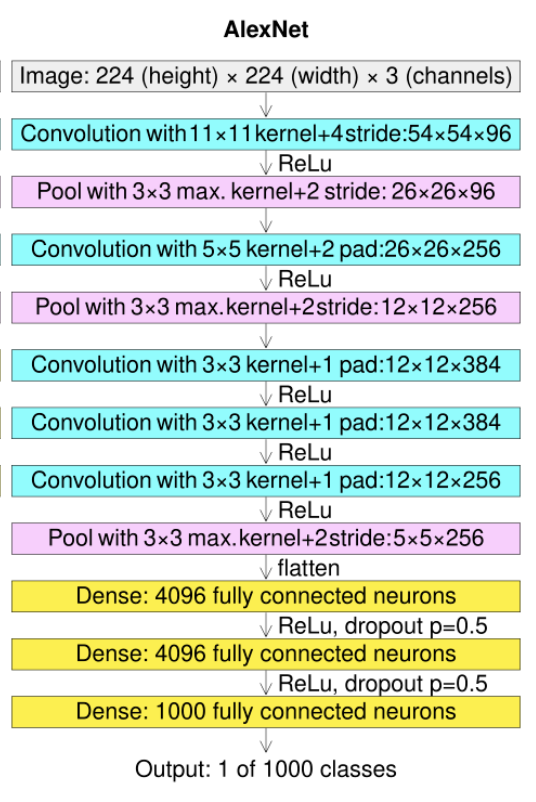

In [330]:
Image(filename='alexnet.png')

### here we can see that there are three channels with image size of 224 x 224 , so we have to resize the and add pixel to the mnist images

In [4]:
(x_train_alex, y_train_alex), (x_test_alex, y_test_alex) = mnist.load_data()

In [6]:
alexnet_image_size = (224,224,3)
def resize_images(images,img_size):
    resized_images = []
    
    for i in tqdm(range(len(images))):
        img = cv2.cvtColor(images[i], cv2.COLOR_GRAY2RGB)
        resized_images.append(resize(img,(img_size),mode = 'constant'))
    
    return np.array(resized_images,dtype='float32')

In [8]:
alex_train = resize_images(x_train_alex[:2000],alexnet_image_size)
alex_train_y = y_train_alex[:2000]
alex_test = resize_images(x_test_alex[:1000],alexnet_image_size)
alex_test_y = y_test_alex[:1000]

100%|██████████████████████████████████████| 1000/1000 [00:07<00:00, 132.05it/s]


In [10]:
# Model creation

In [9]:
def AlexNet(input_shape=(224, 224, 3)):
    model_alex = models.Sequential([
        # Input layer
        layers.Input(shape=input_shape),

        # Layer 1
        layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), padding='valid', activation='relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),

        # Layer 2
        layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),

        # Layer 3
        layers.Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'),

        # Layer 4
        layers.Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'),

        # Layer 5
        layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),

        # Flatten
        layers.Flatten(),
        
        # Fully connected layers
        layers.Dense(units=4096, activation='relu'),
        layers.Dropout(rate=0.5),

        layers.Dense(units=4096, activation='relu'),
        layers.Dropout(rate=0.5),

        layers.Dense(units=10, activation='softmax')
    ])
    return model_alex

In [11]:
model_alex = AlexNet()
model_alex.summary()

2024-08-04 16:55:09.715340: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2024-08-04 16:55:09.715439: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-08-04 16:55:09.715448: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-08-04 16:55:09.715497: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-04 16:55:09.715545: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    26,218,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,787,978 (178.48 MB)

 Trainable params: 46,787,978 (178.48 MB)

 Non-trainable params: 0 (0.00 B)

### data preprocessing

In [14]:
# normalization/scaling

In [13]:
alex_train = alex_train/255
alex_test = alex_train/255

In [20]:
# data agumentation
# datagen = ImageDataGenerator(
#         rotation_range=40, #rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures
#         width_shift_range=0.2, #width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally
#         height_shift_range=0.2, #rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.
#         rescale=1./255, #shear_range is for randomly applying shearing transformations
#         shear_range=0.2, #zoom_range is for randomly zooming inside pictures
#         zoom_range=0.2, #horizontal_flip is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).
#         horizontal_flip=True, #fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.
#         fill_mode='nearest')

In [22]:
datagen.fit(alex_train)

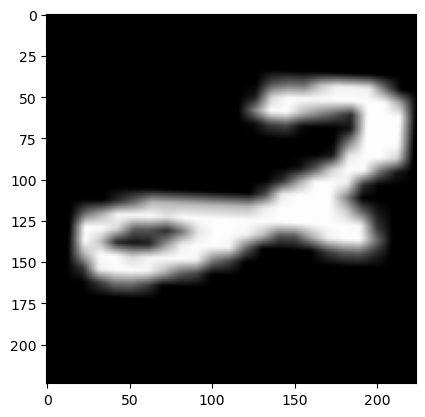

In [24]:
# for x_batch in datagen.flow(alex_train, batch_size=32):
#     # Display the first image in the batch
#     img = tf.keras.preprocessing.image.array_to_img(x_batch[22])
#     plt.imshow(img)
#     plt.show()
#     break  # 

In [15]:
#model compilation

model_alex.compile(loss="sparse_categorical_crossentropy", optimizer= 'adam', metrics=["accuracy"])
model_alex.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    26,218,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,787,978 (178.48 MB)

 Trainable params: 46,787,978 (178.48 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
alex = model_alex.fit(alex_train,alex_train_y, epochs = 15, verbose =1)

Epoch 1/15


2024-08-04 16:55:27.639964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 180ms/step - accuracy: 0.1100 - loss: 2.3021
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 179ms/step - accuracy: 0.1094 - loss: 2.3010
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 180ms/step - accuracy: 0.1133 - loss: 2.2999
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 180ms/step - accuracy: 0.1199 - loss: 2.2993
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 180ms/step - accuracy: 0.1054 - loss: 2.3013
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 180ms/step - accuracy: 0.1136 - loss: 2.3001
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 180ms/step - accuracy: 0.1092 - loss: 2.3008
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 195ms/step - accuracy: 0.1143 - loss: 2.3002
Epoch 9/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 180ms/step - accuracy: 0.1149 - loss: 2.3007
Epoch 10/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 182ms/step - accuracy: 0.1173 - loss: 2.2996
Epoch 11/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 62s 196ms/step - accuracy: 0.1104 - loss: 2.3017
Epoch 12/15
313/313 ━━━━━━━━━━

In [19]:
score2 = model_alex.evaluate(alex_test[:3000], alex_test_y, verbose= 1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.1218 - loss: 2.3005


In [23]:
score2

[2.3021914958953857, 0.1133333370089531]

In [25]:
y_pred = model_alex.predict(alex_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step


In [29]:
y_pred[0]

array([0.10017942, 0.11258218, 0.09915587, 0.10308441, 0.09811859,
       0.0861396 , 0.10146612, 0.10768245, 0.09389317, 0.09769814],
      dtype=float32)

### It is showing even worst result,  accuray ~ 11 % and loss of 2.30

# Transfer Learning

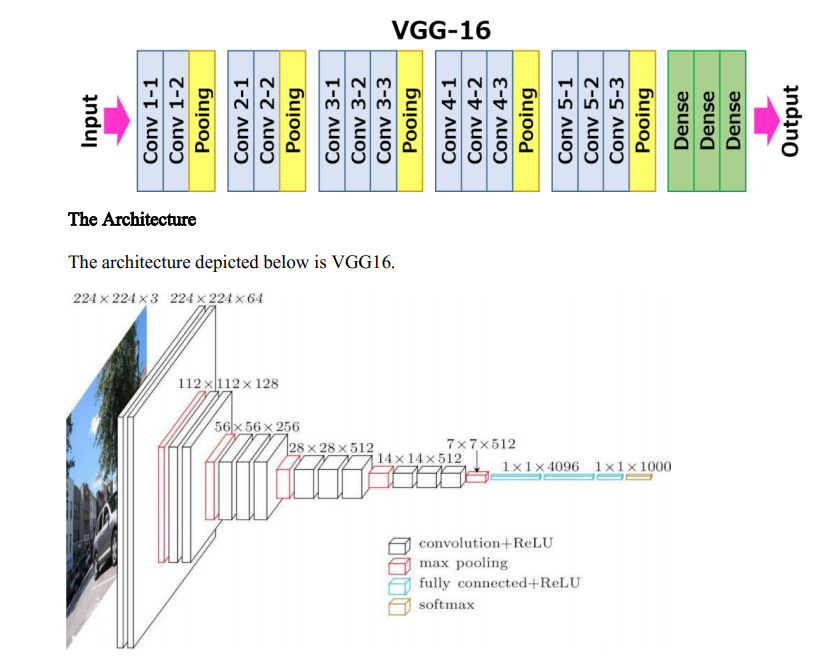

In [40]:
Image(filename='vgg16.png')

VGG16 is a popular convolutional neural network (CNN) architecture that was designed by the Visual Geometry Group (VGG) from the University of Oxford. It is known for its simplicity and depth, which made it a significant model in the development of deep learning techniques for image classification. Here's an overview of the VGG16 architecture:

__Key Features of VGG16__
**Depth:** VGG16 consists of 16 layers that have weights. These layers include 13 convolutional layers and 3 fully connected layers.

__Convolutional Layers:__
The network uses very small receptive fields (3x3 filters) throughout the convolutional layers.
Convolutional layers are stacked on top of each other in increasing depth. The depth of the network increases from 64 to 128, 256, 512, and finally 512 feature maps.

__Pooling Layers:__
Max pooling is performed over a 2x2 pixel window, with a stride of 2.
Pooling layers are interspersed between groups of convolutional layers to progressively reduce the spatial dimensions of the feature maps.
Fully Connected Layers:

The three fully connected layers follow the convolutional layers. The first two have 4096 channels each, while the third performs 1000-way ILSVRC classification and thus contains 1000 channels (one for each class).
The final layer is a softmax layer to output the class probabilities.

__Activation Function:__
ReLU (Rectified Linear Unit) activation function is used after every convolution and fully connected layer.

__Input:__
The input to VGG16 is a fixed-size 224x224 RGB image.
Preprocessing involves subtracting the mean RGB value from each pixel.

In [250]:
(x_train_vgg16, y_train_vgg16),(x_test_vgg16, y_test_vgg16) = mnist.load_data()

In [252]:
x_train_vgg16.shape

(60000, 28, 28)

### Preprocessing the dataset

In [255]:
# #converting the data into three channels
# x_train_vgg16 = np.stack((x_train_vgg16,)*3, axis = -1) 
# x_test_vgg16 = np.stack((x_test_vgg16,)*3, axis = -1) 
vgg_image_size = (224,224,3)
def resize_images(images,img_size):
    resized_images = []
    
    for i in tqdm(range(len(images))):
        img = cv2.cvtColor(images[i], cv2.COLOR_GRAY2RGB)
        resized_images.append(resize(img,(img_size),mode = 'constant'))
    
    return np.array(resized_images,dtype='float32')

In [257]:
x_train_vgg16 = resize_images(x_train_vgg16[:2000],vgg_image_size)
y_train_vgg16= y_train_vgg16[:2000]
x_test_vgg16 = resize_images(x_test_vgg16[:1000],vgg_image_size)
y_test_vgg16 = y_test_vgg16[:1000]

100%|██████████████████████████████████████| 1000/1000 [00:07<00:00, 130.67it/s]


In [258]:
#scaling the data
x_train_vgg16 = x_train_vgg16/255
x_test_vgg16 = x_test_vgg16/255

In [259]:
#categorical one-hot encoding
y_train_vgg16 = to_categorical(y_train_vgg16)
y_test_vgg16 = to_categorical(y_test_vgg16)

### Data Augmentation

In [261]:
datagen = ImageDataGenerator(
    rotation_range = 40, # rotate image to avoide overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)

testdatagen = ImageDataGenerator(fill_mode = 'nearest')

In [262]:
train_itr = datagen.flow(x_train_vgg16, y_train_vgg16)
test_itr = testdatagen.flow(x_test_vgg16, y_test_vgg16)

### Model Creation

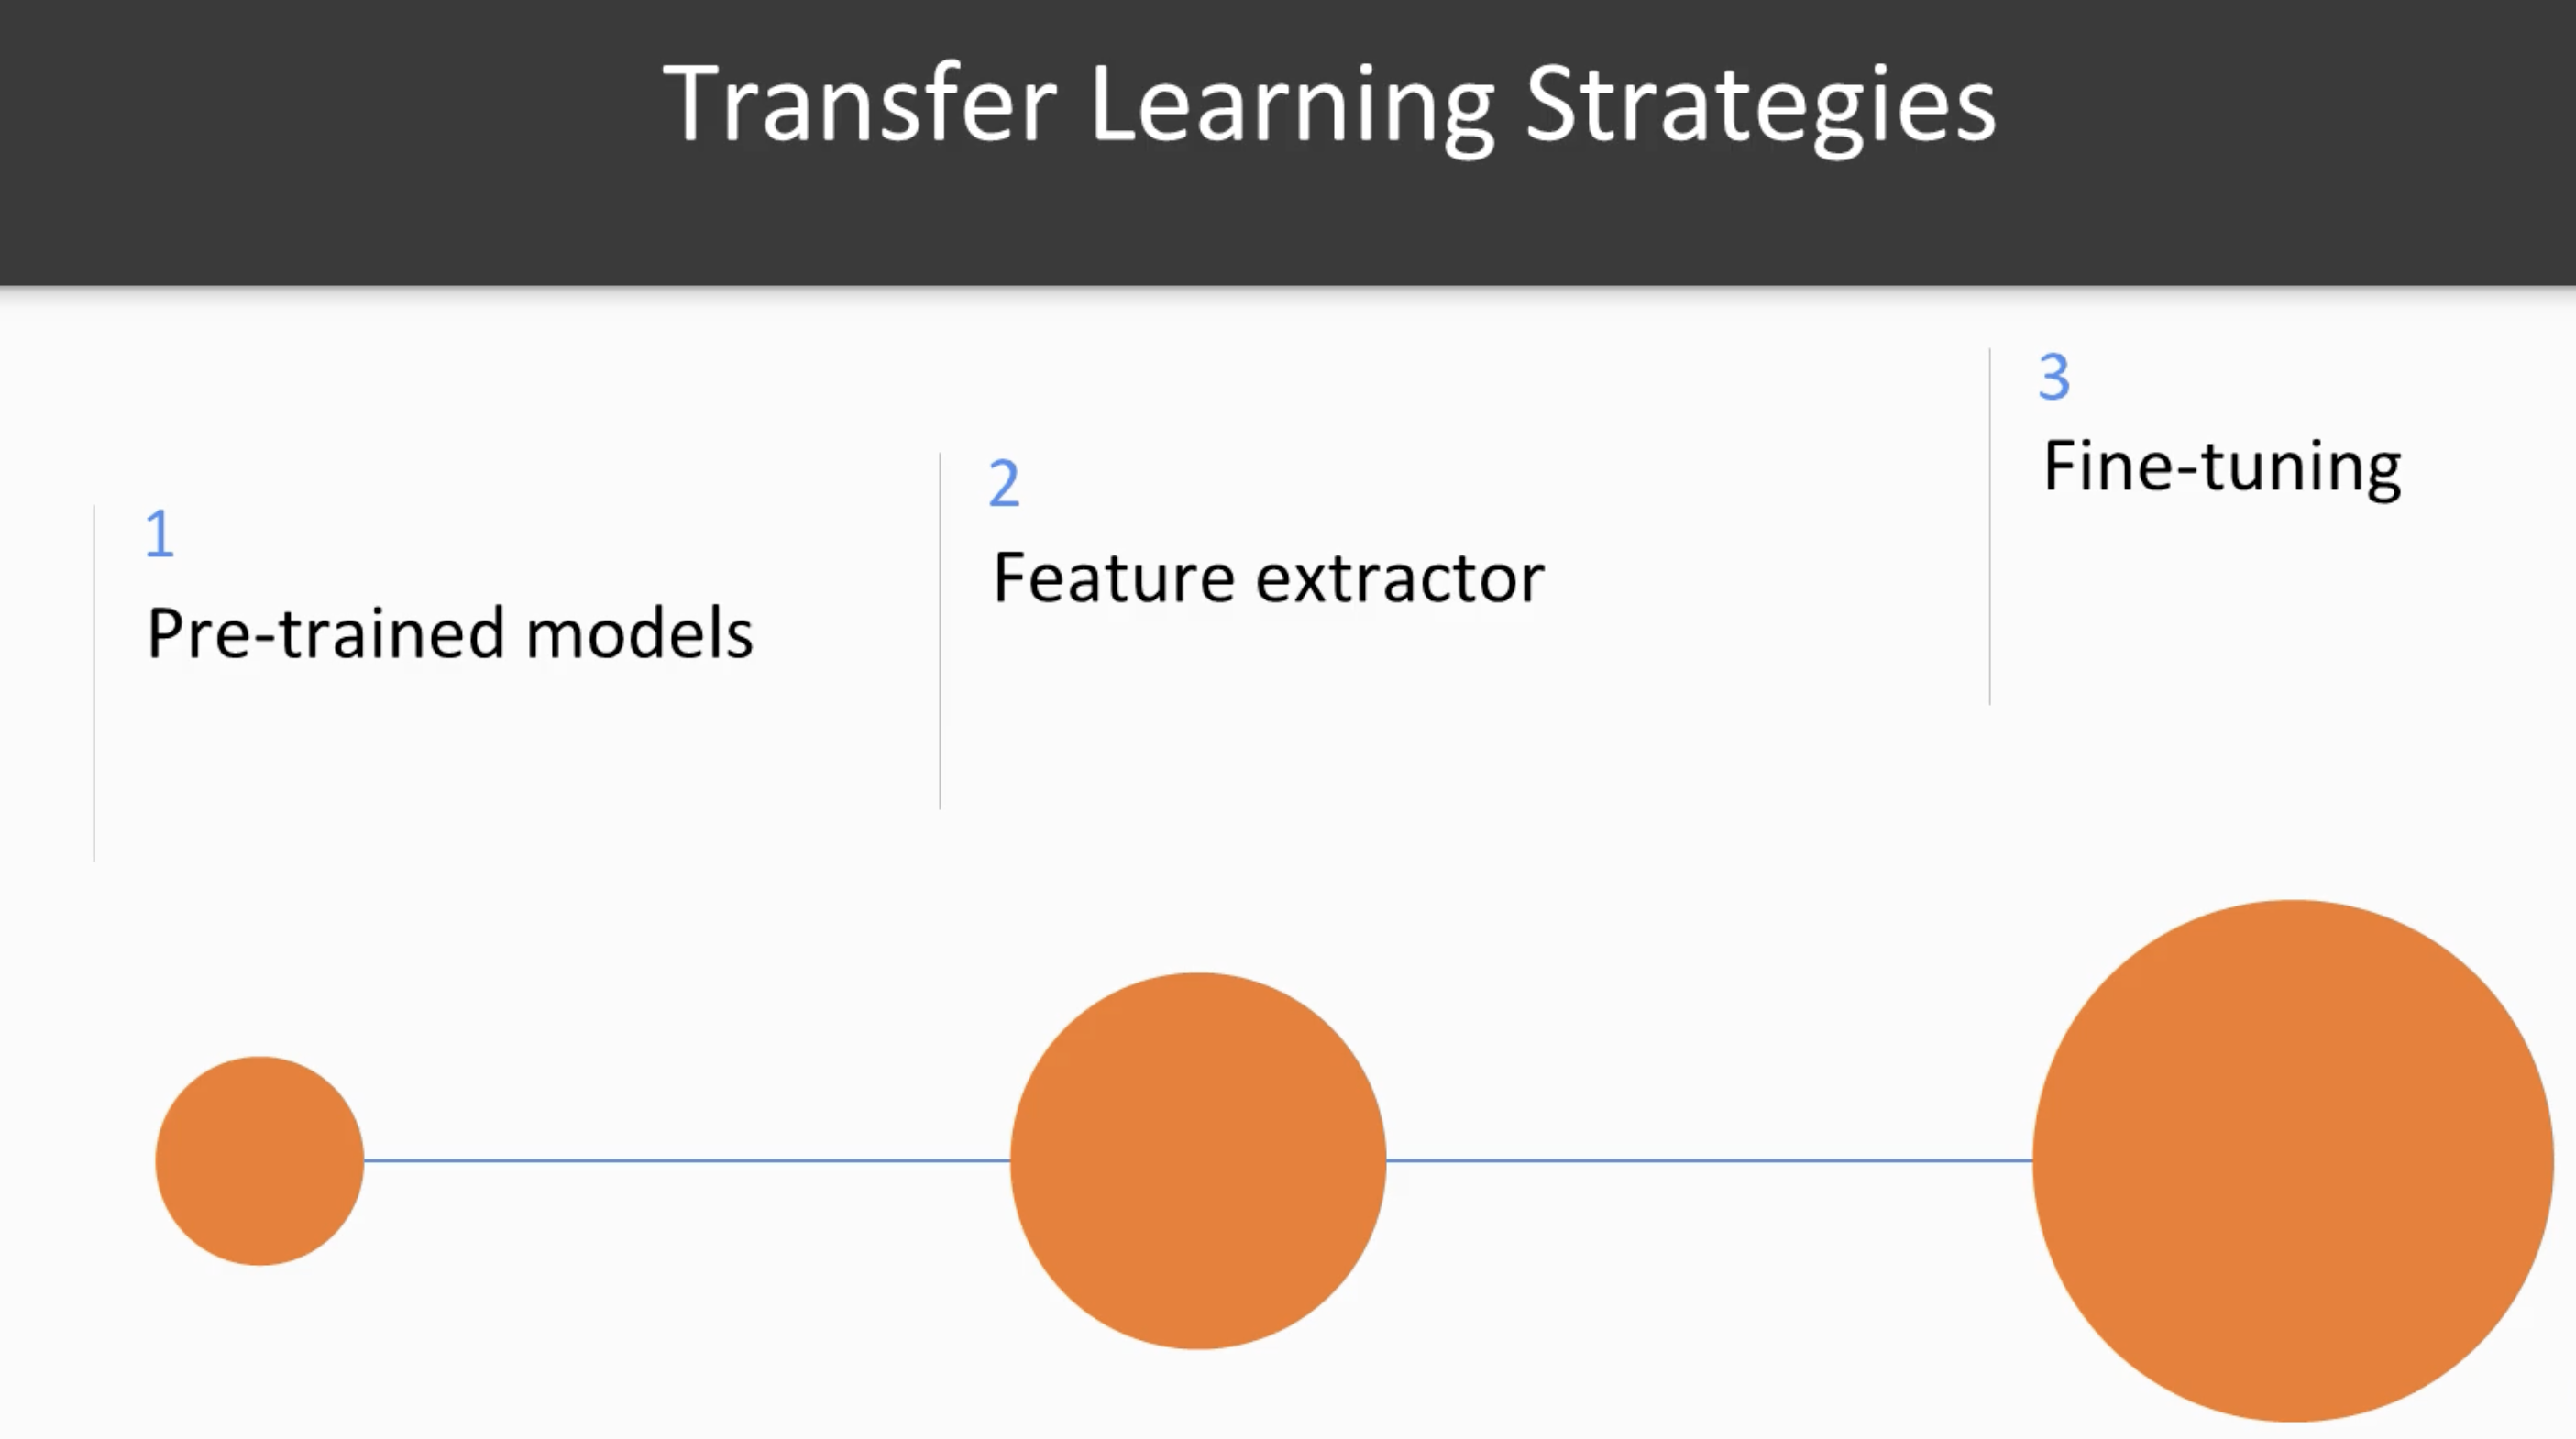

In [280]:
Image(filename='tfr1.png')

In [282]:
from tensorflow.keras.applications import VGG16

Here i will perform transfer learning as feature extractor
1. Base model = Pre trained CovNet minus the top dense layer
2. Freeze all the layers of base model
3. Add classifier on top of base model
4. Train with new dataset

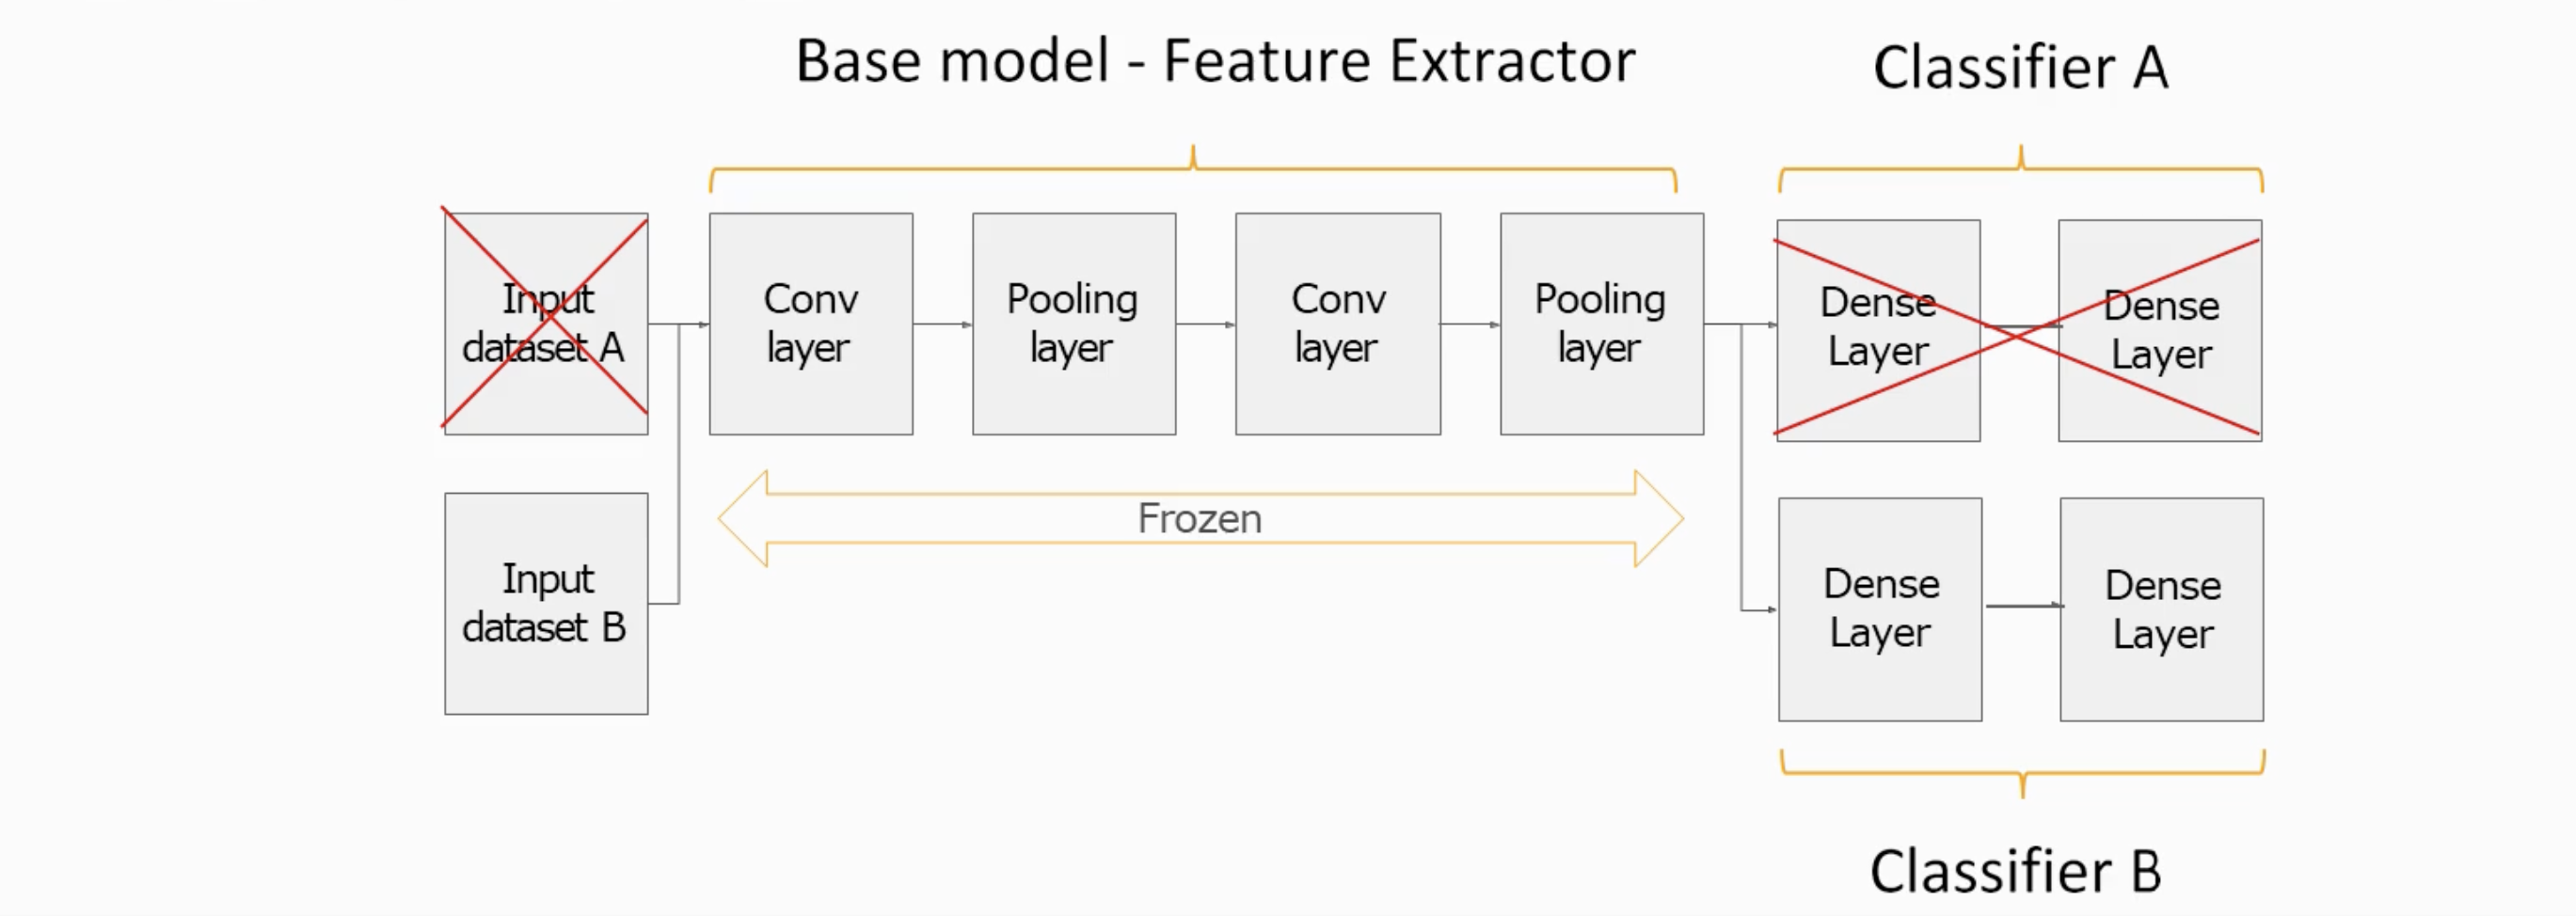

In [285]:
Image(filename='tfl2.png')

In [288]:
base_model = keras.applications.VGG16(
    include_top= False,
    weights="imagenet",
    pooling = 'max',
)

In [290]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [292]:
input_shape = (244, 244, 3)

In [294]:
base_model.trainable = False

In [296]:
def vggnet16(base_model):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        base_model,
        layers.Dense(200, activation = 'relu'),
        layers.Dense(10, activation = 'softmax')
    ])
    return model
    

In [298]:
vgg = vggnet16(base_model)

In [300]:
vgg.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 512)            │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 200)            │       102,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,819,298 (56.53 MB)

 Trainable params: 104,610 (408.63 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [302]:
vgg.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [304]:
vgg.fit(train_itr, epochs=10,validation_data = test_itr,  batch_size = 2000 , verbose=1)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 516ms/step - accuracy: 0.0999 - loss: 2.3797 - val_accuracy: 0.0990 - val_loss: 2.3181
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 520ms/step - accuracy: 0.1085 - loss: 2.3187 - val_accuracy: 0.0940 - val_loss: 2.3167
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 539ms/step - accuracy: 0.1160 - loss: 2.3324 - val_accuracy: 0.0870 - val_loss: 2.3165
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 561ms/step - accuracy: 0.1133 - loss: 2.3295 - val_accuracy: 0.1070 - val_loss: 2.3089
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 565ms/step - accuracy: 0.1176 - loss: 2.3117 - val_accuracy: 0.0990 - val_loss: 2.3175
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 581ms/step - accuracy: 0.1062 - loss: 2.3123 - val_accuracy: 0.1100 - val_loss: 2.3120
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 673ms/step - accuracy: 0.0979 - loss: 2.3203 - val_accuracy: 0.1160 - val_loss: 2.3030
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 245s 4s/step - accuracy: 0.0931 - loss: 2.3114 - val_accura

# ResNet50

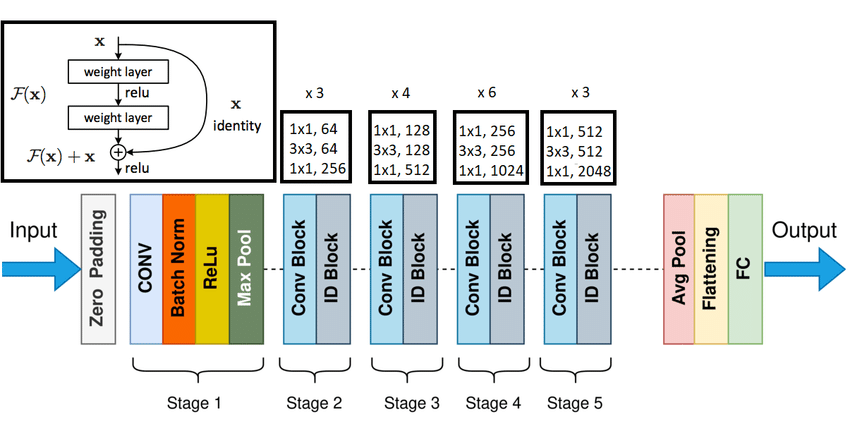

In [55]:
Image(filename='resnet.png')

The ResNet-50 architecture is a deep convolutional neural network designed to address the vanishing gradient problem, allowing the construction and training of very deep networks. Here's a detailed overview of its architecture:

__Layers Breakdown__

__Initial Convolution and Max Pooling Layers:__
__Conv1:__  7x7 convolution with 64 filters, stride 2, followed by batch normalization and ReLU activation.
__Max Pooling:__ 3x3 max pooling with a stride of 2.

__Residual Blocks (Building Blocks):__

The core component of ResNet-50 is the residual block, which typically consists of three convolutional layers.
Each block can be represented as Conv3x3 -> Conv3x3 -> Conv1x1, with a shortcut connection adding the input of the block to its output.
Convolutional Layers by Stage:

__Stage 2:__
3 residual blocks, each containing:
1x1 convolution with 64 filters.
3x3 convolution with 64 filters.
1x1 convolution with 256 filters.

__Stage 3:__
4 residual blocks, each containing:
1x1 convolution with 128 filters.
3x3 convolution with 128 filters.
1x1 convolution with 512 filters.

__Stage 4:__ 
6 residual blocks, each containing:
1x1 convolution with 256 filters.
3x3 convolution with 256 filters.
1x1 convolution with 1024 filters.

__Stage 5:__
3 residual blocks, each containing:
1x1 convolution with 512 filters.
3x3 convolution with 512 filters.
1x1 convolution with 2048 filters.

Fully Connected Layer:

After the convolutional stages, a global average pooling layer is applied to reduce the spatial dimensions to 1x1.
A fully connected layer with 1000 neurons (for 1000 classes in the ImageNet dataset) follows, ending with a softmax activation function for classification.

__Architecture Diagram__

Conv1: 7x7, 64, stride 2
Max Pooling: 3x3, stride 2
Stage 2: 3x (1x1, 64) -> (3x3, 64) -> (1x1, 256)
Stage 3: 4x (1x1, 128) -> (3x3, 128) -> (1x1, 512)
Stage 4: 6x (1x1, 256) -> (3x3, 256) -> (1x1, 1024)
Stage 5: 3x (1x1, 512) -> (3x3, 512) -> (1x1, 2048)
Global Average Pooling
Fully Connected Layer (1000 classes)

__Key Concepts__
Residual Learning: The key idea is to let the layers fit a residual mapping instead of directly trying to fit the desired underlying mapping. This is done using shortcut connections that skip one or more layers.
Bottleneck Design: Each residual block uses a bottleneck design, which consists of three layers instead of the standard two-layer design to make the network more efficient and deeper.


In [11]:
(x_train_resnet50, y_train_resnet50),(x_test_resnet50, y_test_resnet50) = mnist.load_data()

In [13]:
x_train_resnet50 = np.stack((x_train_resnet50,)*3, axis = -1) 
x_test_resnet50 = np.stack((x_test_resnet50,)*3, axis = -1) 

In [15]:
#scaling the data
x_train_resnet50 = x_train_resnet50/255
x_test_resnet50 = x_test_resnet50/255

In [17]:
#categorical one-hot encoding
y_train_resnet50 = to_categorical(y_train_resnet50)
y_test_resnet50 = to_categorical(y_test_resnet50)

In [19]:
datagen = ImageDataGenerator(
    rotation_range = 40, # rotate image to avoide overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)
testdatagen = ImageDataGenerator(fill_mode = 'nearest')

In [21]:
train_itr = datagen.flow(x_train_resnet50, y_train_resnet50)
test_itr = testdatagen.flow(x_test_resnet50, y_test_resnet50)

In [23]:
from keras.applications import ResNet50

In [25]:
base_model2 = keras.applications.ResNet50(
    include_top= False,
    weights="imagenet",
    pooling = 'max',
)

In [27]:
base_model2.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, None,      │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,472 │ conv1_pad[0][0]   │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, None,      │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, None,      │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, None,      │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, None,      │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, None,      │          0 │ conv2_block1_2_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, None,      │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, None,      │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, None,      │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, None,      │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [29]:
base_model2.trainable = False
input_shape = (28,28,3)

In [31]:
def resnet(base_model):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        base_model,
        layers.Dense(512, activation = 'relu'),
        layers.Dense(10, activation = 'softmax')
    ])
    return model
    

In [33]:
resnet50 = resnet(base_model2)

In [35]:
resnet50.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,641,930 (94.00 MB)

 Trainable params: 1,054,218 (4.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [37]:
resnet50.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [88]:
history = resnet50.fit(train_itr, epochs=10,validation_data = test_itr,  batch_size = 2000 , verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 31ms/step - accuracy: 0.5983 - loss: 1.2094 - val_accuracy: 0.8069 - val_loss: 0.5483
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.7903 - loss: 0.6400 - val_accuracy: 0.8699 - val_loss: 0.3990
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.8232 - loss: 0.5366 - val_accuracy: 0.8798 - val_loss: 0.3607
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.8437 - loss: 0.4734 - val_accuracy: 0.8682 - val_loss: 0.3812
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.8572 - loss: 0.4337 - val_accuracy: 0.8978 - val_loss: 0.3018
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.8666 - loss: 0.4100 - val_accuracy: 0.9113 - val_loss: 0.2704
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.8756 - loss: 0.3794 - val_accuracy: 0.8802 - val_loss: 0.3467
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.8795 -

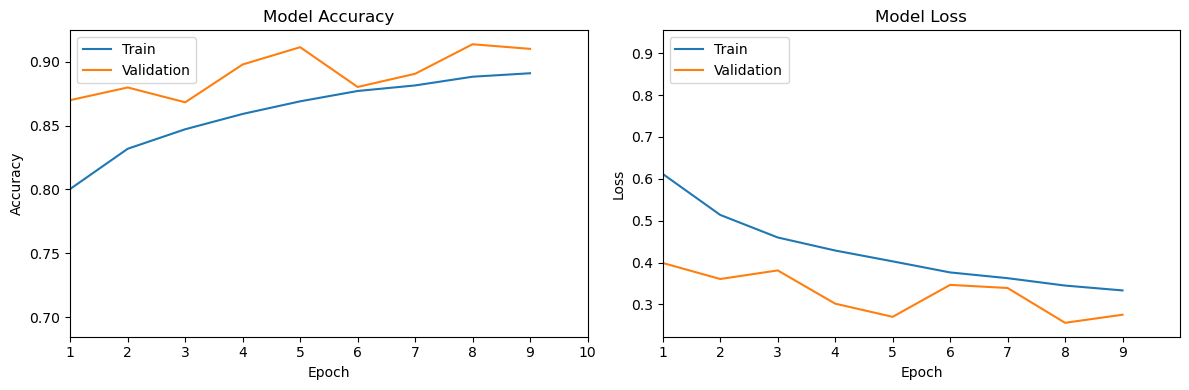

In [90]:
df = pd.DataFrame(history.history)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot training & validation accuracy values
ax[0].plot(df['accuracy'])
ax[0].plot(df['val_accuracy'])
ax[0].set_xlim(1, len(df))
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
ax[1].plot(df['loss'])
ax[1].plot(df['val_loss'])
ax[1].set_xlim(1, len(df))
ax[1].set_xticks(range(1, len(df)))  # Set x-axis ticks to integers
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [92]:
score = resnet50.evaluate(x_test_resnet50, y_test_resnet50, verbose= 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8973 - loss: 0.3069


In [94]:
print("loss", score[0])
print("accuracy", score[1])


loss 0.2754316031932831
accuracy 0.9100000262260437


In [96]:
y_pred_resnet50 = resnet50.predict(x_test_resnet50)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step


In [98]:
test_classes = np.argmax(y_test_resnet50, axis = 1)

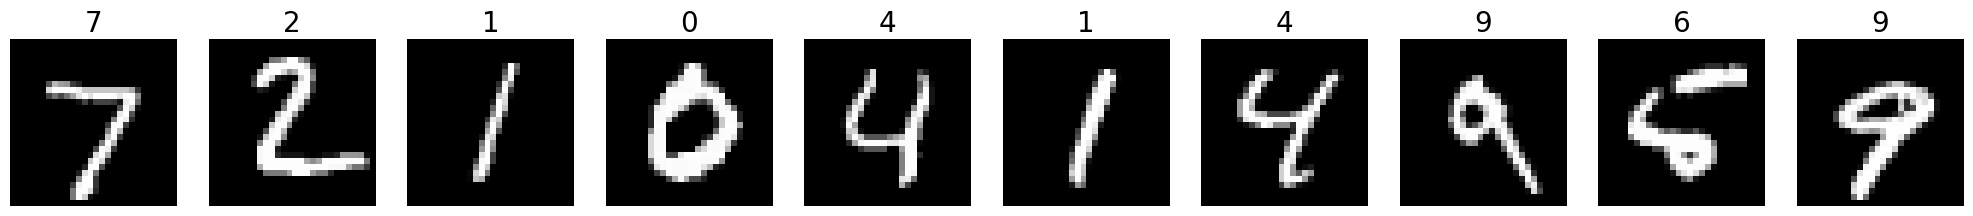

In [100]:
num_images = 10
pred_classes = np.argmax(y_pred_resnet50, axis =1)
# Create a figure
plt.figure(figsize=(num_images * 2, 4))

for i in range(num_images):
    # Display y_test images
    plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test_resnet50[i], cmap='gray')
    plt.title(f"{pred_classes[i]}", fontsize = 20)
    plt.axis('off')
    
    # # Display y_pred images
    # plt.subplot(2, num_images, num_images + i + 1)
    # plt.imshow(y_pred[i], cmap='gray')
    # plt.title("Pred")
    # plt.axis('off')

plt.tight_layout()
plt.show()

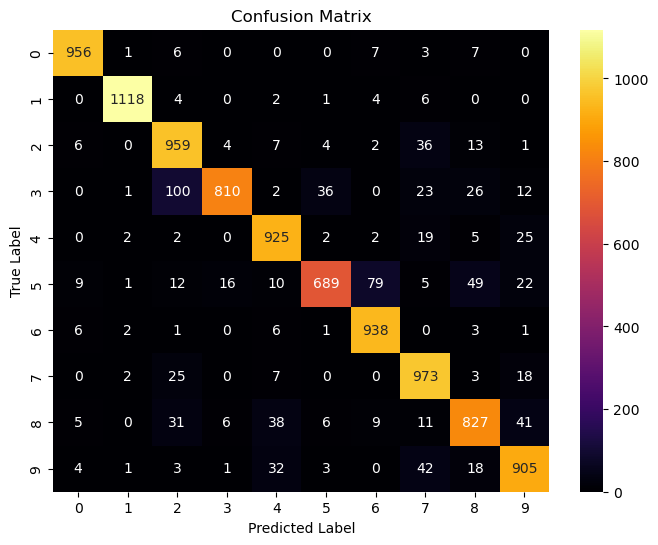

In [106]:
confusion_matrixes(test_classes,pred_classes)

 #### 🔎 Here we can see That how ResNet50 is so Performing well almost Predict the True label  with __Accuracy__ of 91% and loss 0.27

# InceptionV3

__Inception v3 Architecture Summary__

Inception v3 is a deep convolutional neural network designed for image classification tasks. It builds upon the earlier Inception models (v1 and v2) with several improvements to enhance performance and efficiency.

__Key Components:__

Factorized Convolutions:

Breaks down larger convolutions into smaller ones (e.g., 3x3 into two 1x3 and 3x1), reducing computational cost and the number of parameters.

__Asymmetric Convolutions:__

Uses two consecutive 3x3 convolutions instead of a single 5x5 convolution, maintaining the receptive field with less computational expense.

__Auxiliary Classifiers:__

Adds auxiliary classifiers at intermediate layers to help combat the vanishing gradient problem and provide regularization.
Efficient Grid Size Reduction:
Combines convolutions and pooling layers to effectively reduce the spatial dimensions of feature maps.

__Label Smoothing:__

Applies label smoothing to improve generalization by preventing the network from becoming too confident in its predictions.
Architecture Breakdown:

__Stem:__

Initial layers with convolutions and pooling to preprocess the input image and reduce its dimensions.
Inception Modules:

Stacked modules that apply various convolution filters and pooling operations:

__Inception Module A:__ Combines 1x1, 3x3, and 5x5 convolutions with pooling.
__Inception Module B:__ Uses factorized convolutions like 1x7 followed by 7x1.
__Inception Module C:__ Further factorizes convolutions and combines multiple branches.

__Reduction Modules:__

Special modules to reduce spatial dimensions while increasing depth:
Reduction Module A and Reduction Module B.
Auxiliary Classifier:

An intermediate classifier to provide additional gradient signals during training.
Global Average Pooling:

Reduces each feature map to a single value by averaging over spatial dimensions.
Fully Connected Layer:

A dense layer followed by a softmax layer for final classification.


In [12]:
(x_train_inceptionv3, y_train_inceptionv3),(x_test_inceptionv3, y_test_inceptionv3) = mnist.load_data()

In [14]:
# x_train_inceptionv3 = np.stack((x_train_inceptionv3,)*3, axis = -1) 
# x_test_inceptionv3 = np.stack((x_test_inceptionv3,)*3, axis = -1) 

In [16]:
# x = tf.image.resize(x_train_inceptionv3, (299, 299)).numpy()
# y = tf.image.resize(x_test_inceptionv3, (299, 299)).numpy()

inception_image_size = (299,299,3)
def resize_images(images,img_size):
    resized_images = []
    
    for i in tqdm(range(len(images))):
        img = cv2.cvtColor(images[i], cv2.COLOR_GRAY2RGB)
        resized_images.append(resize(img,(img_size),mode = 'constant'))
    
    return np.array(resized_images,dtype='float32')

x_train_inceptionv3 = resize_images(x_train_inceptionv3[:2000],inception_image_size)
y_train_inceptionv3= y_train_inceptionv3[:2000]
x_test_inceptionv3 = resize_images(x_test_inceptionv3[:1000],inception_image_size)
y_test_inceptionv3 = y_test_inceptionv3[:1000]

100%|███████████████████████████████████████| 1000/1000 [00:13<00:00, 75.99it/s]


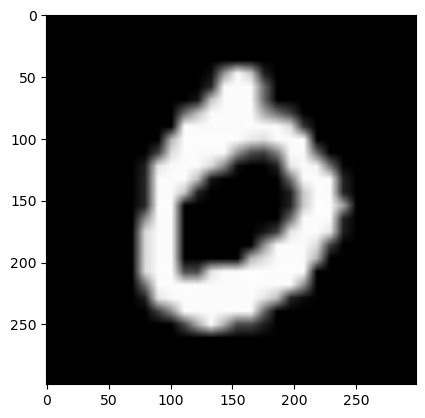

In [18]:
plt.imshow(x_test_inceptionv3[3])

In [20]:
x_test_inceptionv3.shape

(1000, 299, 299, 3)

In [22]:
# #scaling the data
# x_train_inceptionv3 = x_train_inceptionv3/255
# x_test_inceptionv3 = x_test_inceptionv3/255

In [24]:
#categorical one-hot encoding
y_train_inceptionv3 = to_categorical(y_train_inceptionv3)
y_test_inceptionv3 = to_categorical(y_test_inceptionv3)

In [26]:
datagen = ImageDataGenerator(
    rotation_range = 40, # rotate image to avoide overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)
testdatagen = ImageDataGenerator(fill_mode = 'nearest')

In [28]:
train_itr = datagen.flow(x_train_inceptionv3, y_train_inceptionv3)
test_itr = testdatagen.flow(x_test_inceptionv3, y_test_inceptionv3)

In [30]:
from keras.applications import InceptionV3

In [32]:
input_shape = (299,299,3)

In [34]:
base_model3 = keras.applications.InceptionV3(
    include_top= False,
    weights="imagenet",
    pooling = 'max',
    input_shape=(input_shape)
)

In [35]:
base_model3.trainable = False

In [38]:
base_model3.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [40]:
def inceptionv3(base_model):
    model = models.Sequential([
        layers.Input(shape= input_shape, batch_size = 40),
        base_model,
        layers.Dense(512, activation = 'relu'),
        layers.Dense(10, activation = 'softmax'),
    ])
    return model
    

In [42]:
inception = inceptionv3(base_model3)
# inception.build((16,512))

In [44]:
inception.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (40, 2048)             │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (40, 512)              │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (40, 10)               │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,857,002 (87.19 MB)

 Trainable params: 1,054,218 (4.02 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [46]:
inception.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [174]:
history = inception.fit(train_itr, epochs=10,validation_data = test_itr,  batch_size = 300, verbose=1)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 366ms/step - accuracy: 0.8259 - loss: 0.5252 - val_accuracy: 0.8210 - val_loss: 0.5439
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 374ms/step - accuracy: 0.8400 - loss: 0.4804 - val_accuracy: 0.8300 - val_loss: 0.4588
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 398ms/step - accuracy: 0.8468 - loss: 0.4480 - val_accuracy: 0.8100 - val_loss: 0.5376
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 419ms/step - accuracy: 0.8430 - loss: 0.4692 - val_accuracy: 0.8640 - val_loss: 0.4451
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 426ms/step - accuracy: 0.8525 - loss: 0.4338 - val_accuracy: 0.8430 - val_loss: 0.4531
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 422ms/step - accuracy: 0.8529 - loss: 0.4259 - val_accuracy: 0.8060 - val_loss: 0.5620
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 432ms/step - accuracy: 0.8599 - loss: 0.3913 - val_accuracy: 0.8790 - val_loss: 0.3690
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 433ms/step - accuracy: 0.8728 - loss: 0.3782 - val_accu

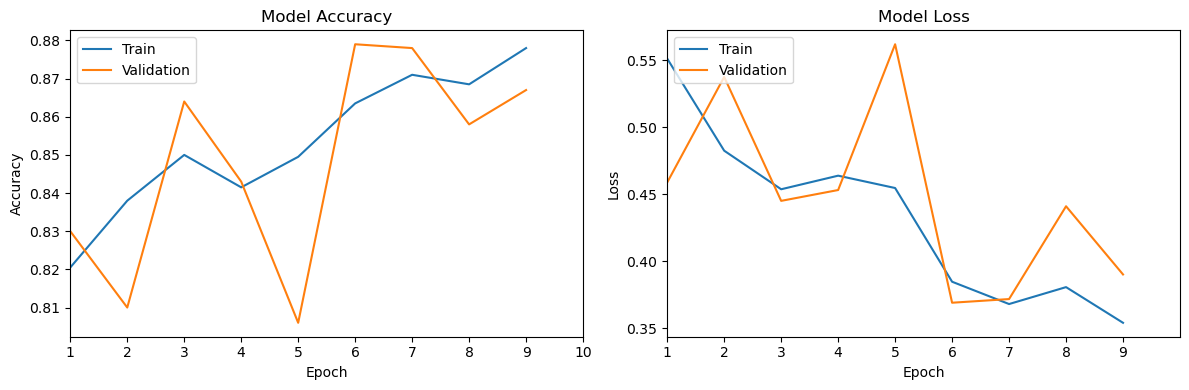

In [192]:
df = pd.DataFrame(history.history)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot training & validation accuracy values
ax[0].plot(df['accuracy'])
ax[0].plot(df['val_accuracy'])
ax[0].set_xlim(1, len(df))
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
ax[1].plot(df['loss'])
ax[1].plot(df['val_loss'])
ax[1].set_xlim(1, len(df))
ax[1].set_xticks(range(1, len(df)))  # Set x-axis ticks to integers
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [178]:
score = inception.evaluate(x_test_inceptionv3, y_test_inceptionv3, verbose= 1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 235ms/step - accuracy: 0.8679 - loss: 0.3880


In [180]:
print("loss", score[0])
print("accuracy", score[1])


loss 0.3900983929634094
accuracy 0.8669999837875366


In [182]:
y_pred_inceptionv3 = inception.predict(x_test_inceptionv3)

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 236ms/step


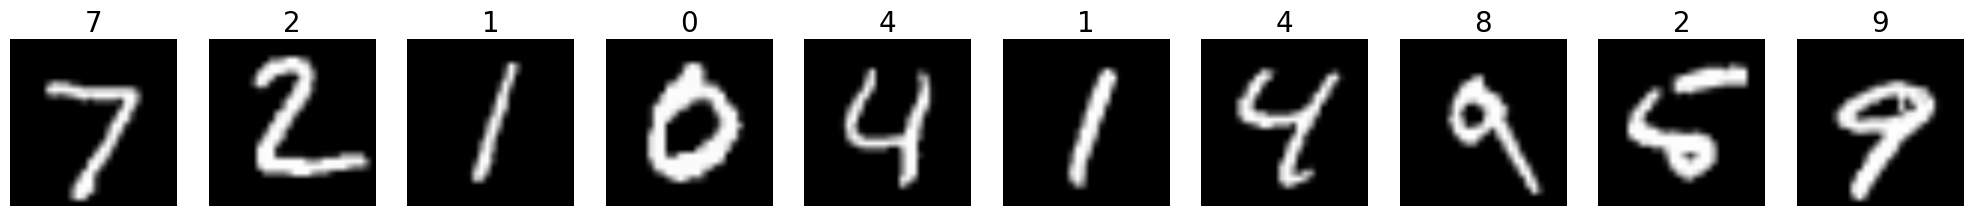

In [184]:
num_images = 10
pred_classes = np.argmax(y_pred_inceptionv3, axis =1)
# Create a figure
plt.figure(figsize=(num_images * 2, 4))

for i in range(num_images):
    # Display y_test images
    plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test_inceptionv3[i], cmap='gray')
    plt.title(f"{pred_classes[i]}", fontsize = 20)
    plt.axis('off')
    
    # # Display y_pred images
    # plt.subplot(2, num_images, num_images + i + 1)
    # plt.imshow(y_pred[i], cmap='gray')
    # plt.title("Pred")
    # plt.axis('off')

plt.tight_layout()
plt.show()

In [186]:
test_class = np.argmax(y_test_inceptionv3, axis =1)

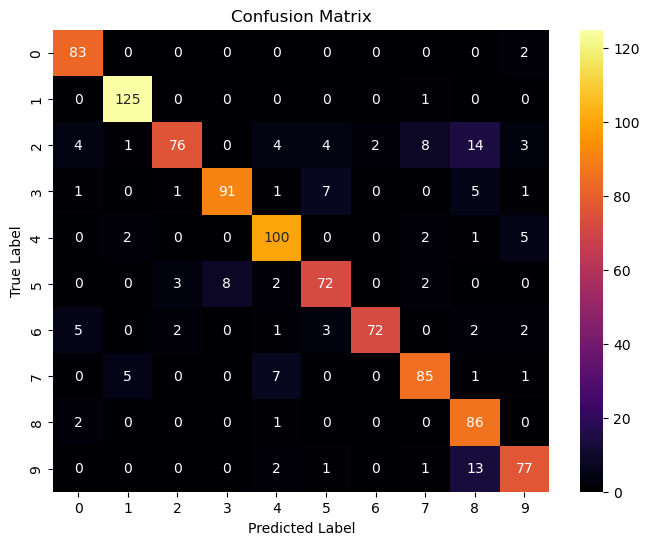

In [194]:
confusion_matrixes(test_class,pred_classes)

### MobileNet

MobileNet was developed by a team of researchers at Google in 2017, who aimed to design an efficient Convolution Neural Network (CNN) for mobile and embedded devices. The model they created was not only significantly smaller in size and efficient but was also at par with top models in terms of performance.

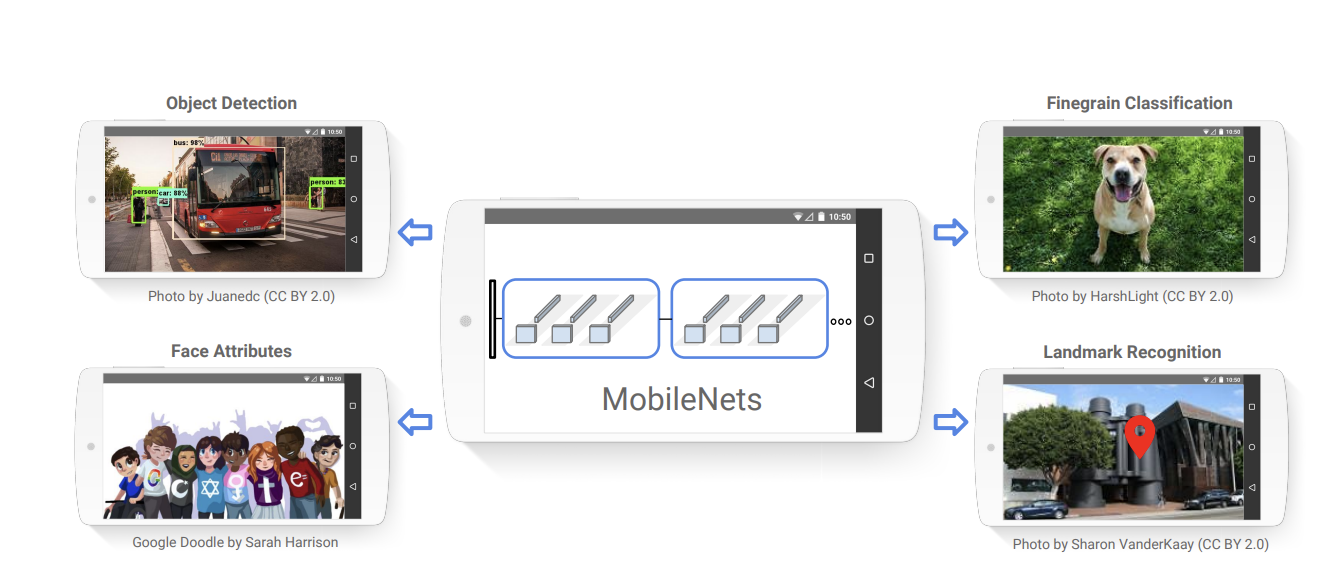

In [7]:
Image(filename='mobilenet.png')

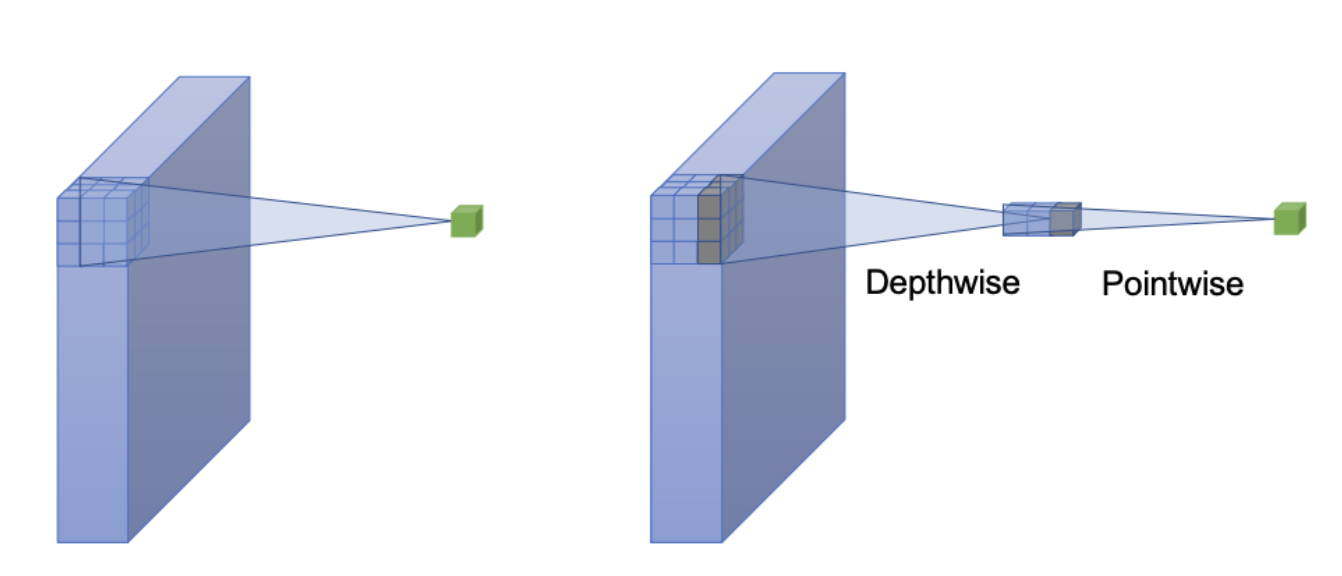

In [9]:
Image(filename='depthvspoint.png')

#### Steps in Depthwise Convolution
1. Separation of Channels: Standard convolution applies filters to each channel of the input image. Whereas depthwise convolution only applies a single filter per input channel.
2. Filter Application: As each filter is applied independently, the output is the result of convolving (multiplication and summation) a single input channel with a dedicated filter.
3. Output Channels: The output of the depthwise convolution has the same number of channels as the input.
4. Reduced Complexity: Compared to standard convolution, the total number of multiplicative operations is reduced.
For standard convolution the total number of multiplicative operations = 𝐾×𝐾×𝐶×𝐷×height×width
For depthwise convolution, the number of operations = 𝐾×𝐾×𝐶× height×width

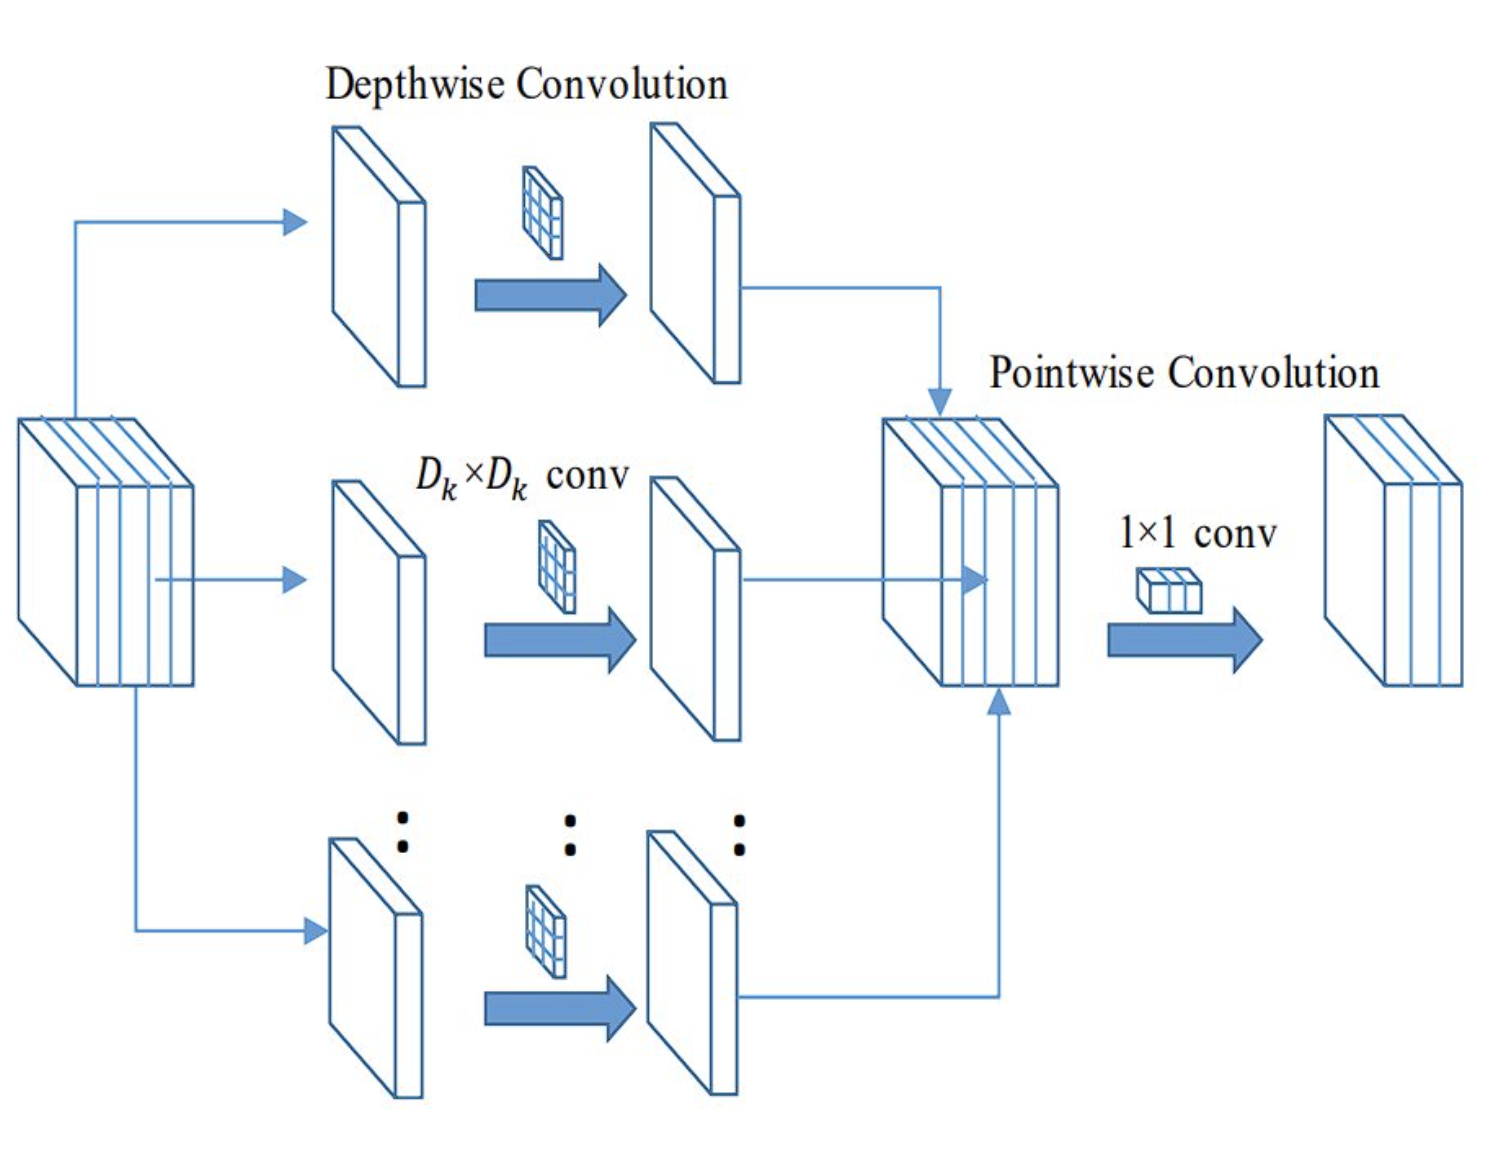

In [13]:
Image(filename='mobdp.png')

#### Pointwise Convolution

To combine features or expand channels, the output of depthwise convolution is applied with pointwise convolution. This is a 1×1 filter, which is applied to each pixel. This combines or expands the channels.

Combining Channel Features: Depthwise convolution processes each input channel separately, therefore interaction between channels doesn’t happen. Pointwise convolution combines these independently processed channel features to create a new feature map. This allows the model to learn from the entire depth of feature maps.

Increases Model Capacity: The interactions between the channels increase the representational capacity of the network. The model can learn complex patterns that depend on the relationships between different feature channels.
Adjusting the Number of Channels: Pointwise convolution enables increasing or decreasing the number of channels in the output feature map.


In [197]:
(x_train_mobilenet , y_train_mobilenet),(x_test_mobilenet, y_test_mobilenet) = mnist.load_data()

In [199]:
mobilenet_image_size = (224,224,3)
def resize_images(images,img_size):
    resized_images = []
    
    for i in tqdm(range(len(images))):
        img = cv2.cvtColor(images[i], cv2.COLOR_GRAY2RGB)
        resized_images.append(resize(img,(img_size),mode = 'constant'))
    
    return np.array(resized_images,dtype='float32')

x_train_mobilenet = resize_images(x_train_mobilenet[:2000],mobilenet_image_size)
y_train_mobilenet= y_train_mobilenet[:2000]
x_test_mobilenet = resize_images(x_test_mobilenet[:1000],mobilenet_image_size)
y_test_mobilenet = y_test_mobilenet[:1000]

100%|██████████████████████████████████████| 1000/1000 [00:07<00:00, 130.98it/s]


In [200]:
#categorical one-hot encoding
y_train_mobilenet = to_categorical(y_train_mobilenet)
y_test_mobilenet = to_categorical(y_test_mobilenet)

In [201]:
datagen = ImageDataGenerator(
    rotation_range = 40, # rotate image to avoide overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)
testdatagen = ImageDataGenerator(fill_mode = 'nearest')

In [202]:
train_itr = datagen.flow(x_train_mobilenet, y_train_mobilenet)
test_itr = testdatagen.flow(x_test_mobilenet, y_test_mobilenet)

In [203]:
from keras.applications import MobileNet

In [204]:
base_model4 = keras.applications.MobileNet(
    include_top= False,
    weights="imagenet",
    pooling = 'max',
)

In [205]:
base_model4.trainable = False
input_shape = (224,224,3)

In [206]:
base_model4.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, None, None, 32) │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, None, None, 32) │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, None, None, 32) │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, None, None, 32) │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, None, None, 64) │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, None, None, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, None, None, 64) │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, None, None, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, None, None,     │         8,192 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, None, None,     │           512 │
│ (BatchNormalization)            │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, None, None,     │         1,152 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, None, None,     │           512 │
│ (BatchNormalization)            │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,228,864 (12.32 MB)

In [207]:
def mobilenet(base_model):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        base_model,
        layers.Dense(512, activation = 'relu'),
        layers.Dense(10, activation = 'softmax')
    ])
    return model
    

In [208]:
mobilenet = mobilenet(base_model4)

In [209]:
mobilenet.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 1024)           │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,758,794 (14.34 MB)

 Trainable params: 529,930 (2.02 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [210]:
mobilenet.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [211]:
history = mobilenet.fit(train_itr, validation_data = train_itr, batch_size = 200, epochs = 10, verbose = 1 )

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 278ms/step - accuracy: 0.4125 - loss: 5.7553 - val_accuracy: 0.8040 - val_loss: 0.5835
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 257ms/step - accuracy: 0.8503 - loss: 0.4464 - val_accuracy: 0.8200 - val_loss: 0.5152
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 261ms/step - accuracy: 0.8776 - loss: 0.3767 - val_accuracy: 0.8770 - val_loss: 0.3654
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 264ms/step - accuracy: 0.9019 - loss: 0.3196 - val_accuracy: 0.9250 - val_loss: 0.2259
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 266ms/step - accuracy: 0.9304 - loss: 0.2281 - val_accuracy: 0.9395 - val_loss: 0.1871
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 268ms/step - accuracy: 0.9247 - loss: 0.2175 - val_accuracy: 0.9120 - val_loss: 0.2525
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 266ms/step - accuracy: 0.9258 - loss: 0.2335 - val_accuracy: 0.9265 - val_loss: 0.1981
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 269ms/step - accuracy: 0.9291 - loss: 0.2139 - val_accu

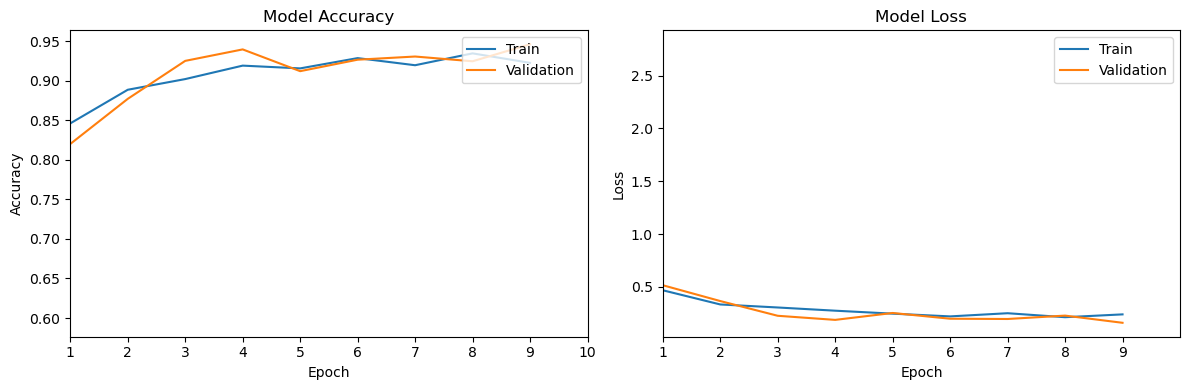

In [212]:
df = pd.DataFrame(history.history)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot training & validation accuracy values
ax[0].plot(df['accuracy'])
ax[0].plot(df['val_accuracy'])
ax[0].set_xlim(1, len(df))
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation loss values
ax[1].plot(df['loss'])
ax[1].plot(df['val_loss'])
ax[1].set_xlim(1, len(df))
ax[1].set_xticks(range(1, len(df)))  # Set x-axis ticks to integers
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [213]:
score = mobilenet.evaluate(x_test_mobilenet, y_test_mobilenet, verbose= 1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9382 - loss: 0.2175


In [214]:
print("loss", score[0])
print("accuracy", score[1])

loss 0.24865402281284332
accuracy 0.925000011920929


In [215]:
y_pred_mobilenet = mobilenet.predict(x_test_mobilenet)

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step


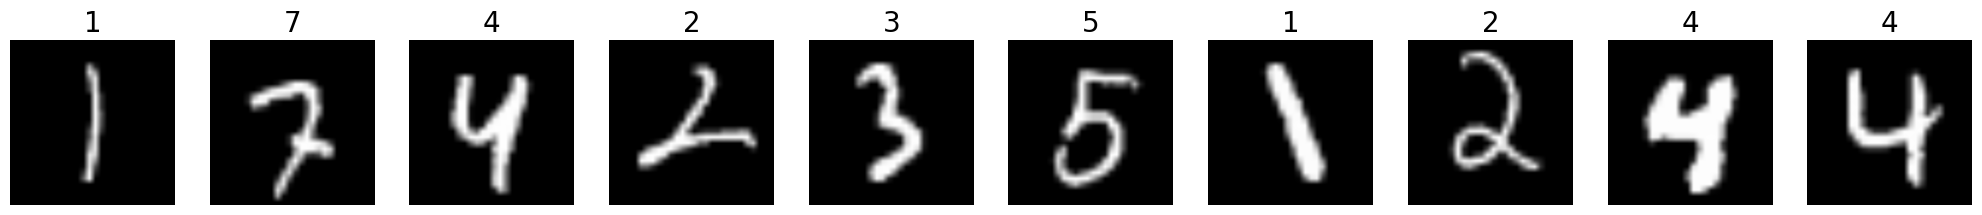

In [216]:
num_images = 50
pred_classes = np.argmax(y_pred_mobilenet, axis =1)
# Create a figure
plt.figure(figsize=(num_images * 2, 4))

for i in range(40,num_images):
    # Display y_test images
    plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test_mobilenet[i], cmap='gray')
    plt.title(f"{pred_classes[i]}", fontsize = 20)
    plt.axis('off')
    
    # # Display y_pred images
    # plt.subplot(2, num_images, num_images + i + 1)
    # plt.imshow(y_pred[i], cmap='gray')
    # plt.title("Pred")
    # plt.axis('off')

plt.tight_layout()
plt.show()

In [217]:
test_class = np.argmax(y_test_mobilenet, axis =1)

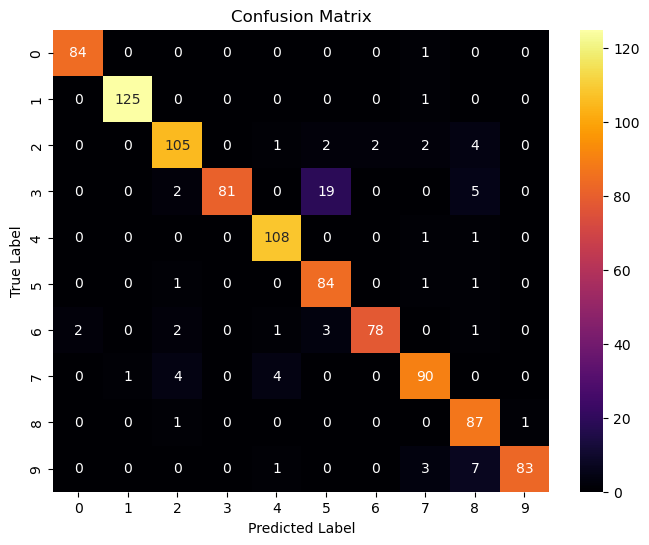

In [218]:
confusion_matrixes(test_class,pred_classes)

#### Here we can see that how correctly Mobile net Predicted the classes with accuracy of 92% and loss of 0.24

In [243]:
from prettytable import PrettyTable


### Summary

In [310]:
z = PrettyTable()
z.field_names = ["Architecture","Accuracy","Loss"]
z.add_row(['LeNet', '0.11', '2.3'])
z.add_row(['AlexNet', '0.12', '2.2'])
z.add_row(['VGG16', '0.12', '2.3'])
z.add_row(['ResNet50', '0.88', '0.33'])
z.add_row(['Inceptionv3', '0.86', '0.39'])
z.add_row(['MobileNet', '0.92', '0.34'])
z.padding_width = 3  # Increase padding width
z.horizontal_char = '-'  # Custom horizontal character
z.vertical_char = '|'  # Custom vertical character
z.junction_char = '+'  # Custom junction character
print(z)

+------------------+--------------+----------+
|   Architecture   |   Accuracy   |   Loss   |
+------------------+--------------+----------+
|      LeNet       |     0.11     |   2.3    |
|     AlexNet      |     0.12     |   2.2    |
|      VGG16       |     0.12     |   2.3    |
|     ResNet50     |     0.88     |   0.33   |
|   Inceptionv3    |     0.86     |   0.39   |
|    MobileNet     |     0.92     |   0.34   |
+------------------+--------------+----------+


In [97]:
from tensorflow.keras.models import load_model

In [39]:
resnet50.save('resnet.h5')

In [41]:
resnet50.save('resnet.keras')

In [ ]:
j = load_model('resnet.keras')

In [61]:
import cv2
from tkinter import *
from tkinter.ttk import *
from PIL import ImageGrab, Image
import numpy as np
from keras.models import load_model

# Load the model
# model = load_model('inception.keras')

# Create global variables
operator = "Predicted Number: "
operator2 = ""

# Create function to clear canvas and text
def Clear():
    cv.delete("all")
    global operator2
    text_input.set(operator2)

# Create function to predict and display predicted number
def Predict():
    file = 'img.png'

    # Save the canvas content as an image file
    x = root.winfo_rootx() + cv.winfo_x()
    y = root.winfo_rooty() + cv.winfo_y()
    x1 = x + cv.winfo_width()
    y1 = y + cv.winfo_height()
    ImageGrab.grab().crop((x, y, x1, y1)).save(file)
    
    img = Image.open(file).convert("L")

    # Convert to grayscale and resize image
    img = img.resize((299, 299))  # Resize image
    
    # Convert to RGB format
    img = img.convert("RGB")
    
    # Convert image to array
    im2arr = np.array(img)
    
    # # Normalize the image array
    # im2arr = im2arr / 255.0
    
    # Reshape array to match model input
    im2arr = im2arr.reshape(1, 299, 299, 3)
    
    # Predict class
    y_pred2 = resnet50.predict(im2arr)
    
    # Convert class to scalar
    x = np.argmax(y_pred2, axis=1)
    
    # Display predicted number
    global operator
    operator = "Predicted Number: " + str(x[0])
    text_input.set(operator)

# Create function to draw on canvas
def paint(event):
    global last_x, last_y
    if last_x and last_y:
        cv.create_line(last_x, last_y, event.x, event.y,
                       width=20, fill="white",
                       capstyle=ROUND, smooth=TRUE, splinesteps=36)
    last_x, last_y = event.x, event.y

def reset_last_xy(event):
    global last_x, last_y
    last_x, last_y = None, None

# Initialize Tkinter window
root = Tk()

# Create string variable
text_input = StringVar()

# Create field to display text
textdisplay = Entry(root, textvariable=text_input, justify='center')

# Create predict and clear buttons
btn1 = Button(root, text="Predict", command=Predict)
btn2 = Button(root, text="Clear", command=Clear)

# Create canvas to draw on
cv = Canvas(root, width=200, height=200, bg="black")

# Initialize variables for drawing
last_x, last_y = None, None

# Bind the left mouse button to draw
cv.bind('<B1-Motion>', paint)
cv.bind('<ButtonRelease-1>', reset_last_xy)

# Organize the elements
cv.grid(row=0, column=0)
textdisplay.grid(row=0, column=1)
btn1.grid(row=1, column=0)
btn2.grid(row=1, column=1)

# Configure window resizing
root.rowconfigure(0, weight=2)
root.columnconfigure(1, weight=2)

root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


# Summary

1. There are many Architecture which is developed by the researchers throught out the time to detect the features of the images
2. Some of the Architecture are very accurate to predict or to recognize the fratues like ResNet50, InceptionV3, Mobilenet(for mobile
3. Mobile Net perfom very well because it is built on light CNN model
4. Transfer learning is very much useful because we can use the pre trained model for recognizing our features

# Challenges

1. Understanding the transfer learning
2. Understanding the OpenCV 
3. making CNN Models
4. Which loading the saved model it showing lots of errors, challenge was to rectify those errors